<a href="https://colab.research.google.com/github/gops-sukumar/MLprojects/blob/main/SFPD_Traffic_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyze SFPD traffic violations Dataset

## Data Dictionary:
Below is the explanation of the columns of the dataset:

1. **doj_record_id**: Unique record ID (type: str)
2. **person_number**: Number of persons involved (type: int64)
3. **agency_ori**: agency ID where the case originated (type: str)
3. **stop_datetime**: Date and Time of stopping the person (type: datetime)
4. **duration_of_stop**: Duration of stopping the person in minutes (type: int64)
5. **is_stop_response_to_call**: Indicates whether the stop is a response to a call. (type: bool)
6. **location**: Location of the stop. (type: str)
7. **district**: Police district of the stop location. (type: str)
8. **city**: City of the stop location. (type: str)
9. **perceived_race_ethnicity**: Perceived race/ethnicity of the person stopped. (type: str)
10. **erceived_gender**: Perceived gender of the person stopped. (type: str)
11. **is_lgbt**: Is the person LGBT (type: bool)
12. **perceived_age**: Perceived age of the person (type: int64)
13. **perceived_age_group**: Perceived age group of the person (type: int64 range)
14. **had_limited_or_no_english**: Does the person stopped have limited or no English proficiency to speak (type: bool)
15. **perceived_or_known_disability**: Perceived or any known disability (type: str)
16. **reason_for_stop**: Reason for stopping the person (type: str)
17. **traffic_violation_type**: Type of traffic violation by the person. (type: str)
18. **traffic_viol_cjis_off_code**: Traffic violation official code. (type: int64)
19. **traffic_viol_off_code**: Traffic violation official code String. (type: str)
20. **traffic_viol_off_statute**: Traffic violation official Statute. (type: int64)
21. **suspicion_cjis_off_code**: Suspicion Official code. (type: int64)
22. **suspicion_off_code_txt**: Suspicion Official code text. (type: str)
23. **suspicion_off_statute**: Suspicion Official statute. (type: str)
24. **suspicion_sub_type**: Suspicion sub-type (type: str)
25. **actions_taken**: Actions taken during the stop. (type: str)
26. **basis_for_search**: Basis for the search during the stop. (type: str)
27. **basis_for_property_seizure**: Basis for the property seizure during the stop. (type: str)
28. **type_of_property_seized**: Type of property seized during the stop. (type: str)
29. **contraband_or_evidence**: Contraband or evidence found during the stop. (type: str)
30. **results_of_stop**: Results of the action taken during the stop. (type: str)
31. **longitude**: Longitude of the place where stopped. (type: float)
32. **latitude**: Latitude of the place where stopped. (type: float)
33. **supervisor_district**: District of the Supervising officer. (type: str)
34. **analysis_neighborhoods**: Neighborhoods where the analysis took place. (type: str)


## Problem Definition:
Given a dataset with the above data-dictionary, on a given day, predict the busy districts and their coordinates for the SFPD to be able to help them predict the strength of the Police personnel to be deployed in them.

* To start with, First try to cluster the incidents for different geographical coordinates against time. This gives a sense of busier time periods involved in different geographical coordinates on any day (without getting into the details of what weekday/weekend it is Or which month it is). We simply start with the analysis of hours against geographical coordinates data. This would provide a detailed understanding of the incidents against time and geo-coordinates.

* Next we can cluster the geographical coordinates against weekend vs. weekday. This would give an understanding how and where SFPD needs to concentrate on.

* Based on different days of the month, there might be a pattern in these incidents for SFPD to understand which districts are red, orange, yellow, and green.

In [ ]:
# Import libraries for data manipulation
import numpy as np
import pandas as pd
import scipy as sp

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Read the data
fpath = "/content/drive/MyDrive/Colab Notebooks/SFPD_Traffic_Violations/SFPD_Stop_Dataset.csv"
df = pd.read_csv(fpath)
# Returns the first 5 rows
df.head()

NameError: name 'pd' is not defined

In [ ]:
df.shape

(17979, 35)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17979 entries, 0 to 17978
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   doj_record_id                  17979 non-null  object 
 1   person_number                  17979 non-null  int64  
 2   agency_ori                     17979 non-null  object 
 3   stop_datetime                  17979 non-null  object 
 4   duration_of_stop               17979 non-null  int64  
 5   is_stop_response_to_call       17979 non-null  bool   
 6   location                       17977 non-null  object 
 7   district                       17979 non-null  object 
 8   city                           17975 non-null  object 
 9   perceived_race_ethnicity       17979 non-null  object 
 10  perceived_gender               17979 non-null  object 
 11  is_lgbt                        17979 non-null  bool   
 12  perceived_age                  17979 non-null 

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_number,17979.0,1.102286,0.680812,0.000000,1.000000,1.000000,1.000000,37.000000
duration_of_stop,17979.0,21.986206,52.819860,1.000000,6.000000,10.000000,21.000000,1440.000000
perceived_age,17979.0,36.845598,12.638221,0.000000,28.000000,35.000000,45.000000,100.000000
traffic_viol_cjis_off_code,17979.0,32627.509038,27536.210918,0.000000,0.000000,54106.000000,54186.000000,99999.000000
suspicion_cjis_off_code,17979.0,11305.338228,20323.254716,0.000000,0.000000,0.000000,22004.000000,99999.000000
longitude,15567.0,-122.424316,0.026157,-122.511425,-122.435625,-122.417027,-122.406879,-122.363425
latitude,15567.0,37.769519,0.022298,37.707950,37.759586,37.775332,37.784753,37.828019
supervisor_district,17979.0,5.125647,3.234788,0.000000,3.000000,6.000000,8.000000,11.000000


In [ ]:
df.isnull().sum()

doj_record_id                        0
person_number                        0
agency_ori                           0
stop_datetime                        0
duration_of_stop                     0
is_stop_response_to_call             0
location                             2
district                             0
city                                 4
perceived_race_ethnicity             0
perceived_gender                     0
is_lgbt                              0
perceived_age                        0
perceived_age_group                 43
had_limited_or_no_english            0
perceived_or_known_disability    17276
reason_for_stop                     44
traffic_violation_type            7388
traffic_viol_cjis_off_code           0
traffic_viol_off_code             7389
traffic_viol_off_statute          7389
suspicion_cjis_off_code              0
suspicion_off_code_txt           12422
suspicion_off_statute            12422
suspicion_sub_type               11539
actions_taken            

In [ ]:
df.location.nunique()

10638

Index(['person_number', 'duration_of_stop', 'perceived_age',
       'traffic_viol_cjis_off_code', 'suspicion_cjis_off_code', 'longitude',
       'latitude', 'supervisor_district'],
      dtype='object')


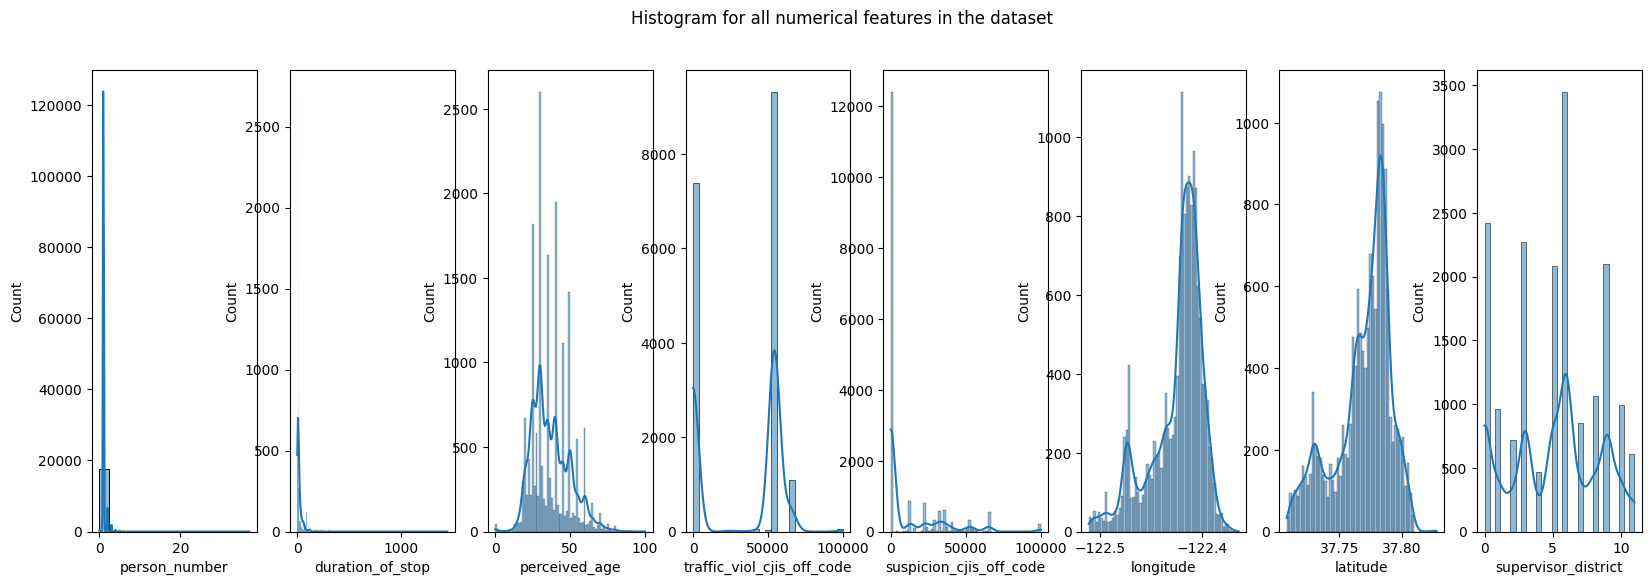

In [ ]:
'''
for col in df:
  if (df[col].dtype == 'int64'):
    print(col)
'''
numerical_cols = df.select_dtypes(include=['number']).columns
print(numerical_cols)
fig, axes = plt.subplots(1, len(numerical_cols), figsize = (20, 6))
fig.suptitle('Histogram for all numerical features in the dataset')
for i, col in enumerate(numerical_cols):
    sns.histplot(x = col, data = df, kde = True, ax = axes[i]);

In [ ]:
categorical_cols = df.select_dtypes(exclude=['number']).columns
print(categorical_cols)
fig, axes = plt.subplots(len(categorical_cols)//2, 2, figsize = (20, 6))
fig.suptitle('Barplots for all categorical features in the dataset')
for i, col in enumerate(categorical_cols):
    sns.countplot(ax = axes[i//2 + 1, i%2], x = col, data = df,
              order = df[col].value_counts().index);

Index(['doj_record_id', 'agency_ori', 'stop_datetime',
       'is_stop_response_to_call', 'location', 'district', 'city',
       'perceived_race_ethnicity', 'perceived_gender', 'is_lgbt',
       'perceived_age_group', 'had_limited_or_no_english',
       'perceived_or_known_disability', 'reason_for_stop',
       'traffic_violation_type', 'traffic_viol_off_code',
       'traffic_viol_off_statute', 'suspicion_off_code_txt',
       'suspicion_off_statute', 'suspicion_sub_type', 'actions_taken',
       'basis_for_search', 'basis_for_property_seizure',
       'type_of_property_seized', 'contraband_or_evidence', 'results_of_stop',
       'analysis_neighborhoods'],
      dtype='object')


IndexError: index 13 is out of bounds for axis 0 with size 13

Error in callback <function flush_figures at 0x788d4ecdda20> (for post_execute):


KeyboardInterrupt: 

In [ ]:
print(df.district.nunique())
print(df.district.unique())

15
['Airport' 'CENTRAL' 'BAYVIEW' 'NORTHERN' 'TENDERLOIN' 'SOUTHERN'
 'RICHMOND' 'MISSION' 'INGLESIDE' 'OUT OF SF / UNK' 'TARAVAL' 'PARK'
 'AIRPORT' 'Southern' 'UNK/OUT OF SF']


In [ ]:
df.latitude.nunique()

4175

In [ ]:
df.longitude.nunique()

5226

In [ ]:
df.results_of_stop.nunique()

55

In [ ]:
df[df['district'] == 'OUT OF SF / UNK'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 20 to 17974
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   doj_record_id                  1094 non-null   object 
 1   person_number                  1094 non-null   int64  
 2   agency_ori                     1094 non-null   object 
 3   stop_datetime                  1094 non-null   object 
 4   duration_of_stop               1094 non-null   int64  
 5   is_stop_response_to_call       1094 non-null   bool   
 6   location                       1093 non-null   object 
 7   district                       1094 non-null   object 
 8   city                           1091 non-null   object 
 9   perceived_race_ethnicity       1094 non-null   object 
 10  perceived_gender               1094 non-null   object 
 11  is_lgbt                        1094 non-null   bool   
 12  perceived_age                  1094 non-null  

In [ ]:
# Drop those records that are of value 'OUT OF SF / UNK'
#df.drop(df[df['district'] == 'OUT OF SF / UNK'].index, inplace=True)
df.drop(df.loc[df.district.str.contains('OUT OF SF') == True].index, inplace = True)
df.drop(df[df['district'] == 'UNK'].index, inplace=True)
print(df.district.unique())

['Airport' 'CENTRAL' 'BAYVIEW' 'NORTHERN' 'TENDERLOIN' 'SOUTHERN'
 'RICHMOND' 'MISSION' 'INGLESIDE' 'TARAVAL' 'PARK' 'AIRPORT' 'Southern']


In [ ]:
# Data cleaning for values which are not captured in the usual CAPITALS format
df.loc[df['district'] == 'Airport', 'district'] = 'AIRPORT'
df.loc[df['district'] == 'Southern', 'district'] = 'SOUTHERN'
print(df['district'].unique())

['AIRPORT' 'CENTRAL' 'BAYVIEW' 'NORTHERN' 'TENDERLOIN' 'SOUTHERN'
 'RICHMOND' 'MISSION' 'INGLESIDE' 'TARAVAL' 'PARK']


In [ ]:
# Data imputation for Latitude and Longitude with Median values from the records
# whose districts are same as the current record.
# So plan how to do that.
print(df.loc[df['district'] == 'AIRPORT', 'longitude'])
print(df.loc[df['district'] == 'AIRPORT', 'longitude'].median())
print(df.loc[df['longitude'].isnull(), 'district'].unique())
print(df.loc[df['latitude'].isnull(), 'district'].unique())
print(df[df['district'] == 'AIRPORT'].count())

0       NaN
12      NaN
48      NaN
77      NaN
197     NaN
         ..
17933   NaN
17957   NaN
17963   NaN
17971   NaN
17978   NaN
Name: longitude, Length: 1483, dtype: float64
-122.417961
['AIRPORT' 'TENDERLOIN' 'MISSION' 'CENTRAL' 'SOUTHERN' 'TARAVAL'
 'NORTHERN' 'RICHMOND' 'INGLESIDE' 'PARK' 'BAYVIEW']
['AIRPORT' 'TENDERLOIN' 'MISSION' 'CENTRAL' 'SOUTHERN' 'TARAVAL'
 'NORTHERN' 'RICHMOND' 'INGLESIDE' 'PARK' 'BAYVIEW']
doj_record_id                    1483
person_number                    1483
agency_ori                       1483
stop_datetime                    1483
duration_of_stop                 1483
is_stop_response_to_call         1483
location                         1483
district                         1483
city                             1483
perceived_race_ethnicity         1483
perceived_gender                 1483
is_lgbt                          1483
perceived_age                    1483
perceived_age_group              1481
had_limited_or_no_english        1483
perc

In [ ]:
# Drop the records for which 'results_of_stop', 'perceived_age_group' are null.
df.dropna(subset = ['results_of_stop', 'perceived_age_group'], inplace=True)
df.shape

(16869, 35)

In [ ]:
# Function to fill null values in column X with the median of non-null values for each group in column Y
def fill_nulls_with_median(group):
    median_value = group.median()
    return group.fillna(median_value)

# Function to fill null values in column X with the mode of non-null values for each group in column Y
def fill_nulls_with_mode(group):
    median_value = group.mode()
    return group.fillna(mode_value)

df['longitude'] = df.groupby('district')['longitude'].transform(fill_nulls_with_median)
df['latitude'] = df.groupby('district')['latitude'].transform(fill_nulls_with_median)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16869 entries, 0 to 17978
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   doj_record_id                  16869 non-null  object 
 1   person_number                  16869 non-null  int64  
 2   agency_ori                     16869 non-null  object 
 3   stop_datetime                  16869 non-null  object 
 4   duration_of_stop               16869 non-null  int64  
 5   is_stop_response_to_call       16869 non-null  bool   
 6   location                       16869 non-null  object 
 7   district                       16869 non-null  object 
 8   city                           16869 non-null  object 
 9   perceived_race_ethnicity       16869 non-null  object 
 10  perceived_gender               16869 non-null  object 
 11  is_lgbt                        16869 non-null  bool   
 12  perceived_age                  16869 non-null 

In [ ]:
#df['traffic_viol_off_code'][df['traffic_viol_off_code'].isnull() == True] = df['suspicion_off_code_txt']
# Impute 'traffic_viol_off_code' containing null values with the data from 'suspicion_off_code_txt'
df['traffic_viol_off_code'].fillna(df['suspicion_off_code_txt'], inplace =True)
print(df['traffic_viol_off_code'].isnull().sum(), df.shape)

# After possible data imputation for 'traffic_viol_off_code',
# 1. Drop the records with 'traffic_viol_off_code' that are still null.
# 2. Drop the column 'suspicion_off_code_txt'.

df.dropna(subset = ['traffic_viol_off_code'], inplace = True)
df.drop(['suspicion_off_code_txt'], axis = 1, inplace = True)

print(df['traffic_viol_off_code'].isnull().sum(), df.shape)

1638 (16869, 35)
0 (15231, 34)


In [ ]:
# Impute null values for known Disability with None since it means no disability observed.
df['perceived_or_known_disability'].fillna('None', inplace=True)

In [ ]:
df.isna().sum()

doj_record_id                        0
person_number                        0
agency_ori                           0
stop_datetime                        0
duration_of_stop                     0
is_stop_response_to_call             0
location                             0
district                             0
city                                 0
perceived_race_ethnicity             0
perceived_gender                     0
is_lgbt                              0
perceived_age                        0
perceived_age_group                  0
had_limited_or_no_english            0
perceived_or_known_disability        0
reason_for_stop                      0
traffic_violation_type            5177
traffic_viol_cjis_off_code           0
traffic_viol_off_code                0
traffic_viol_off_statute          5177
suspicion_cjis_off_code              0
suspicion_off_statute            10054
suspicion_sub_type               10054
actions_taken                     9127
basis_for_search         

In [ ]:
df.drop(['agency_ori', 'traffic_violation_type', 'traffic_viol_cjis_off_code',
         'traffic_viol_off_statute', 'suspicion_cjis_off_code',
         'suspicion_sub_type', 'suspicion_off_statute', 'actions_taken',
         'basis_for_search', 'type_of_property_seized', 'basis_for_property_seizure',
         'contraband_or_evidence', 'supervisor_district', 'analysis_neighborhoods'],
         axis = 1, inplace = True)
df.reset_index()

,index,doj_record_id,person_number,stop_datetime,duration_of_stop,is_stop_response_to_call,location,district,city,perceived_race_ethnicity,...,is_lgbt,perceived_age,perceived_age_group,had_limited_or_no_english,perceived_or_known_disability,reason_for_stop,traffic_viol_off_code,results_of_stop,longitude,latitude
0,0,U3801210950BC4735479,1,2023-06-28 8:06,90,True,Terminal 2 departure level,AIRPORT,UNINCORPORATED AREA-SAN MATEO COUNTY,White,...,False,25,18 - 29,False,None,Reasonable suspicion that this person was enga...,CCW ON PERSON,In-field cite and release,-122.417961,37.772833
1,1,U380119317C3E8C5B763,2,2023-06-28 2:55,70,False,100 Block of Post St,CENTRAL,SAN FRANCISCO,White,...,False,55,50 - 59,False,None,Traffic violation,UNSAFE LANE CHANGE/ETC,Custodial arrest pursuant to outstanding warrant,-122.403662,37.788894
2,2,U3801230394D2CE1DD8C,1,2023-06-28 2:54,60,False,WISCONSIN ST / CORAL RD,BAYVIEW,SAN FRANCISCO,Black/African American,...,False,30,30 - 39,False,Mental health condition,Reasonable suspicion that this person was enga...,WIL DISCH F/ARM W/GRS NEG,No action,-122.398607,37.753822
3,3,U3801200535E536B558D,1,2023-06-27 23:30,1,False,GOLDEN GATE AVE / VAN NESS AVE,NORTHERN,SAN FRANCISCO,Black/African American,...,False,35,30 - 39,False,None,Traffic violation,JAYWALKING,Custodial arrest pursuant to outstanding warrant,-122.420441,37.781031
4,4,U3801193185A47A72A8B,1,2023-06-27 22:43,120,True,O''Farrell Street and Grant Street,TENDERLOIN,SAN FRANCISCO,Black/African American,...,False,18,18 - 29,False,None,Reasonable suspicion that this person was enga...,ROBBERY:SECOND DEGREE,Custodial arrest without warrant,-122.404584,37.786731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15226,17973,U380119155D970984F21,1,2022-06-01 9:00,7,False,mission st / 5th st,SOUTHERN,SAN FRANCISCO,Middle Eastern or South Asian,...,False,50,50 - 59,False,None,Traffic violation,ILEGAL UTURN:BUS DIST/ETC,In-field cite and release,-122.406480,37.782732
15227,17975,U380120032BAF6B08164,1,2022-06-01 8:30,15,False,TARAVAL ST / 22ND AVE,TARAVAL,SAN FRANCISCO,Black/African American,...,False,52,50 - 59,False,None,Traffic violation,FAIL STOP VEH:XWALK/ETC,In-field cite and release,-122.478906,37.742909
15228,17976,U380119259EACE14EC00,1,2022-06-01 8:03,10,False,Polk and Geary,NORTHERN,SAN FRANCISCO,Asian,...,False,60,60 or over,False,None,Traffic violation,NO HND HLD DEVICE W/DRIVE,Citation for infraction,-122.419740,37.785893
15229,17977,U380121271C6C6B8240D,1,2022-06-01 7:57,7,False,MONTGOMERY ST / NEW MONTGOMERY ST,CENTRAL,SAN FRANCISCO,White,...,False,78,60 or over,False,None,Traffic violation,FAIL TO OBEY TURN SIGNS,Citation for infraction,-122.402067,37.788721


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15231 entries, 0 to 17978
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   doj_record_id                  15231 non-null  object 
 1   person_number                  15231 non-null  int64  
 2   stop_datetime                  15231 non-null  object 
 3   duration_of_stop               15231 non-null  int64  
 4   is_stop_response_to_call       15231 non-null  bool   
 5   location                       15231 non-null  object 
 6   district                       15231 non-null  object 
 7   city                           15231 non-null  object 
 8   perceived_race_ethnicity       15231 non-null  object 
 9   perceived_gender               15231 non-null  object 
 10  is_lgbt                        15231 non-null  bool   
 11  perceived_age                  15231 non-null  int64  
 12  perceived_age_group            15231 non-null 

In [ ]:
df.isna().sum()

doj_record_id                    0
person_number                    0
stop_datetime                    0
duration_of_stop                 0
is_stop_response_to_call         0
location                         0
district                         0
city                             0
perceived_race_ethnicity         0
perceived_gender                 0
is_lgbt                          0
perceived_age                    0
perceived_age_group              0
had_limited_or_no_english        0
perceived_or_known_disability    0
reason_for_stop                  0
traffic_viol_off_code            0
results_of_stop                  0
longitude                        0
latitude                         0
dtype: int64

In [ ]:
# Data Transformation:
# Changing a string type date column into datetime variable type and then splitting the date-time into Year, Month, day, Hour and Minute.
df['stop_datetime'] = pd.to_datetime(df['stop_datetime'])
df['stop_datetime'].dt.strftime("%y-%m-%d %H:%M")
df['stop_year'] = df['stop_datetime'].dt.year
df['stop_month'] = df['stop_datetime'].dt.month
df['stop_day'] = df['stop_datetime'].dt.day
df['stop_hour'] = df['stop_datetime'].dt.hour
df['stop_minute'] = df['stop_datetime'].dt.minute
df['is_stop_weekend'] = df['stop_datetime'].dt.weekday > 3

#df.drop(['stop_date'], axis = 1, inplace = True)
# Function to calculate the 3-hour window
def calculate_3_hour_window(hour):
    return f'{(hour // 3) * 3:02d}-{((hour // 3) * 3) + 2:02d}'

# Apply the function to create a new column '3_hour_window'
df['3_hour_window'] = df['stop_hour'].apply(calculate_3_hour_window)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15231 entries, 0 to 17978
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   doj_record_id                  15231 non-null  object        
 1   person_number                  15231 non-null  int64         
 2   stop_datetime                  15231 non-null  datetime64[ns]
 3   duration_of_stop               15231 non-null  int64         
 4   is_stop_response_to_call       15231 non-null  bool          
 5   location                       15231 non-null  object        
 6   district                       15231 non-null  object        
 7   city                           15231 non-null  object        
 8   perceived_race_ethnicity       15231 non-null  object        
 9   perceived_gender               15231 non-null  object        
 10  is_lgbt                        15231 non-null  bool          
 11  perceived_age  

,doj_record_id,person_number,stop_datetime,duration_of_stop,is_stop_response_to_call,location,district,city,perceived_race_ethnicity,perceived_gender,...,results_of_stop,longitude,latitude,stop_year,stop_month,stop_day,stop_hour,stop_minute,is_stop_weekend,3_hour_window
0,U3801210950BC4735479,1,2023-06-28 08:06:00,90,True,Terminal 2 departure level,AIRPORT,UNINCORPORATED AREA-SAN MATEO COUNTY,White,Male,...,In-field cite and release,-122.417961,37.772833,2023,6,28,8,6,False,06-08
1,U380119317C3E8C5B763,2,2023-06-28 02:55:00,70,False,100 Block of Post St,CENTRAL,SAN FRANCISCO,White,Male,...,Custodial arrest pursuant to outstanding warrant,-122.403662,37.788894,2023,6,28,2,55,False,00-02
2,U3801230394D2CE1DD8C,1,2023-06-28 02:54:00,60,False,WISCONSIN ST / CORAL RD,BAYVIEW,SAN FRANCISCO,Black/African American,Male,...,No action,-122.398607,37.753822,2023,6,28,2,54,False,00-02
3,U3801200535E536B558D,1,2023-06-27 23:30:00,1,False,GOLDEN GATE AVE / VAN NESS AVE,NORTHERN,SAN FRANCISCO,Black/African American,Male,...,Custodial arrest pursuant to outstanding warrant,-122.420441,37.781031,2023,6,27,23,30,False,21-23
4,U3801193185A47A72A8B,1,2023-06-27 22:43:00,120,True,O''Farrell Street and Grant Street,TENDERLOIN,SAN FRANCISCO,Black/African American,Female,...,Custodial arrest without warrant,-122.404584,37.786731,2023,6,27,22,43,False,21-23


In [ ]:
target_classes = df['results_of_stop'].unique()
print(f"Number of Target classes: {len(target_classes)}, \nTarget classes: {target_classes}")

Number of Target classes: 48, 
Target classes: ['In-field cite and release'
 'Custodial arrest pursuant to outstanding warrant' 'No action'
 'Custodial arrest without warrant' 'Warning (verbal or written)'
 'Noncriminal or caretaking transport (including transport by officer, ambulance or other agency)'
 'Custodial arrest pursuant to outstanding warrant | Custodial arrest without warrant'
 'Field interview card completed'
 'Custodial arrest without warrant | Contacted parent/legal guardian or other person responsible for the minor'
 'Citation for infraction'
 'Citation for infraction | Custodial arrest without warrant'
 'Citation for infraction | In-field cite and release'
 'Psychiatric hold (W&I Code 5150 or 5585.20)'
 'Warning (verbal or written) | Custodial arrest without warrant'
 'Contacted U.S. Department of Homeland Security (e.g., ICE or CBP) | Warning (verbal or written)'
 'Custodial arrest without warrant | Noncriminal or caretaking transport (including transport by officer, 

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_number,15231.0,1.095529,0.686422,1.000000,1.000000,1.000000,1.000000,37.000000
duration_of_stop,15231.0,20.212264,47.438988,1.000000,6.000000,10.000000,20.000000,1440.000000
perceived_age,15231.0,37.101241,12.503530,1.000000,28.000000,35.000000,45.000000,100.000000
longitude,15231.0,-122.424084,0.025431,-122.511425,-122.433820,-122.417961,-122.407802,-122.363425
latitude,15231.0,37.770031,0.021108,37.708086,37.761817,37.773285,37.784152,37.828019
stop_year,15231.0,2022.490184,0.499920,2022.000000,2022.000000,2022.000000,2023.000000,2023.000000
stop_month,15231.0,6.432473,3.313379,1.000000,4.000000,6.000000,9.000000,12.000000
stop_day,15231.0,15.647101,8.796735,1.000000,8.000000,16.000000,23.000000,31.000000
stop_hour,15231.0,14.158821,6.148677,0.000000,10.000000,15.000000,19.000000,23.000000
stop_minute,15231.0,28.070120,17.478934,0.000000,14.000000,29.000000,43.000000,59.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15231 entries, 0 to 17978
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   doj_record_id                  15231 non-null  object        
 1   person_number                  15231 non-null  int64         
 2   stop_datetime                  15231 non-null  datetime64[ns]
 3   duration_of_stop               15231 non-null  int64         
 4   is_stop_response_to_call       15231 non-null  bool          
 5   location                       15231 non-null  object        
 6   district                       15231 non-null  object        
 7   city                           15231 non-null  object        
 8   perceived_race_ethnicity       15231 non-null  object        
 9   perceived_gender               15231 non-null  object        
 10  is_lgbt                        15231 non-null  bool          
 11  perceived_age  

In [ ]:

import pandas as pd

# Sample DataFrame
data = {'X': [1, 2, None, 4, 5, 6, None, None, 9],
        'Y': ['A', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'A']}

sdf = pd.DataFrame(data)
print(sdf)

# Function to fill null values in column X with the median of non-null values for each group in column Y
def fill_nulls_with_median(group):
    median_value = group.median()
    return group.fillna(median_value)

# Apply the function to fill null values in column X
sdf['X'] = sdf.groupby('Y')['X'].transform(fill_nulls_with_median)
print(sdf)

     X  Y
0  1.0  A
1  2.0  B
2  NaN  A
3  4.0  B
4  5.0  A
5  6.0  B
6  NaN  A
7  NaN  B
8  9.0  A
     X  Y
0  1.0  A
1  2.0  B
2  5.0  A
3  4.0  B
4  5.0  A
5  6.0  B
6  5.0  A
7  4.0  B
8  9.0  A


In [ ]:
from sklearn.preprocessing import StandardScaler

coordinates = ['longitude', 'latitude']
scaled_coordinates = ['scaled_longitude', 'scaled_latitude']

# Use StandardScaler
scaler = StandardScaler()
df[scaled_coordinates] = scaler.fit_transform(df[coordinates])
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_number,15231.0,1.095529e+00,0.686422,1.000000,1.000000,1.000000,1.000000,37.000000
duration_of_stop,15231.0,2.021226e+01,47.438988,1.000000,6.000000,10.000000,20.000000,1440.000000
perceived_age,15231.0,3.710124e+01,12.503530,1.000000,28.000000,35.000000,45.000000,100.000000
longitude,15231.0,-1.224241e+02,0.025431,-122.511425,-122.433820,-122.417961,-122.407802,-122.363425
latitude,15231.0,3.777003e+01,0.021108,37.708086,37.761817,37.773285,37.784152,37.828019
stop_year,15231.0,2.022490e+03,0.499920,2022.000000,2022.000000,2022.000000,2023.000000,2023.000000
stop_month,15231.0,6.432473e+00,3.313379,1.000000,4.000000,6.000000,9.000000,12.000000
stop_day,15231.0,1.564710e+01,8.796735,1.000000,8.000000,16.000000,23.000000,31.000000
stop_hour,15231.0,1.415882e+01,6.148677,0.000000,10.000000,15.000000,19.000000,23.000000
stop_minute,15231.0,2.807012e+01,17.478934,0.000000,14.000000,29.000000,43.000000,59.000000


## Univariate Analysis

Perform analysis on single variables or fearures one by one.

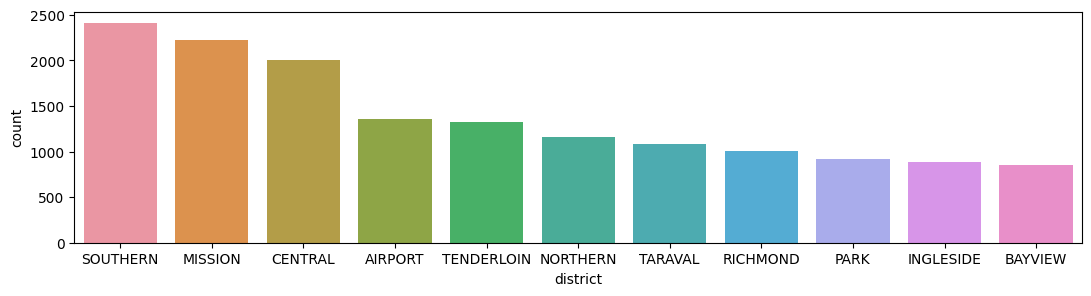

In [ ]:
plt.figure(figsize = (13,3))
sns.countplot(data = df, order = df.district.value_counts().index, x = 'district')
plt.show()

The above countplot portrays that districs like Southern, Mission and Central do have a large amount of incidents compared to the others. Each of them easily cross the 2000 incidents mark in the last 1 year.

In [ ]:
df['location'].value_counts()

FUNSTON AVE / CABRILLO ST    203
SFO..                         96
SFO Airport                   63
MISSION ST / 16TH ST          49
TNC Lot 1                     46
                            ... 
WALLER ST & PIERCE ST          1
CLAYTON ST & FELL ST           1
CALIFORNIA ST & 9TH AVE        1
McDonnell Rd /  TNC1           1
Polk and Geary                 1
Name: location, Length: 8755, dtype: int64

32.88


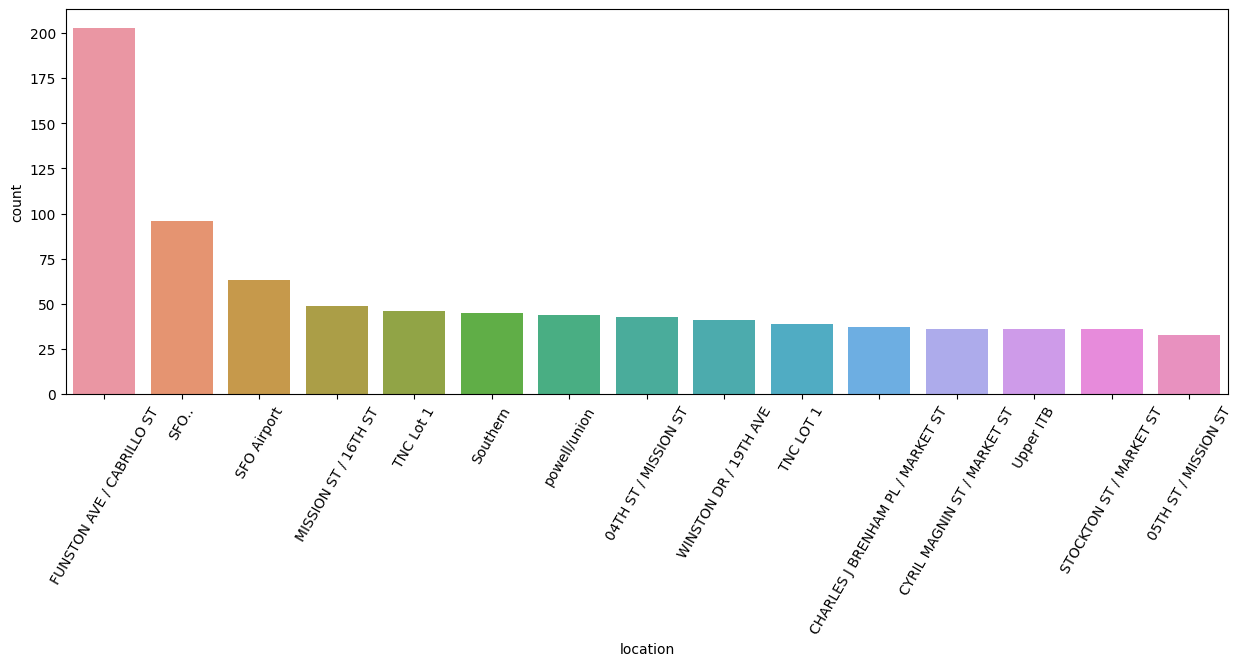

In [ ]:
print(df['location'].value_counts().iloc[:50].mean())
plt.figure(figsize = (15,5))
sns.countplot(data = df, order = df.location.value_counts().iloc[:15].index,
              x = 'location')
plt.xticks(rotation = 60)
plt.show()

From the above countplot on location, it looks like a uncharacteristically higher number of incidents occur at location 'FUNSTON AVE / CABRILLO ST'. Altough others are significantly lower compared to this location, SFO (93) and SFO Airport (63) seem to be a bit higher than the mean of top 50 locations (32.88).

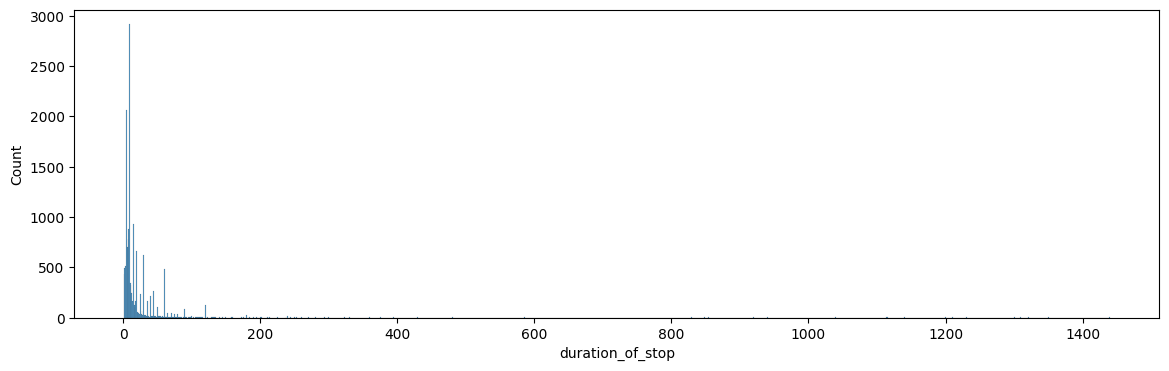

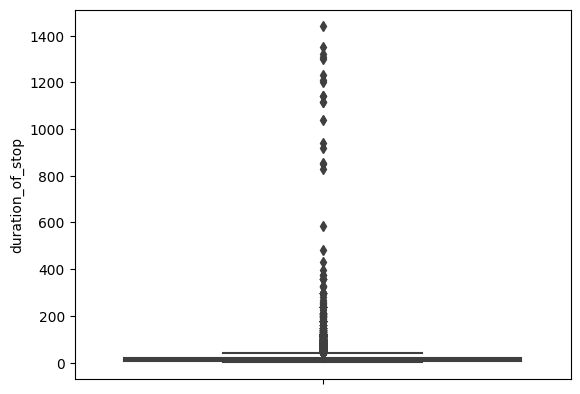

In [ ]:
plt.figure(figsize = (14,4))
sns.histplot(data = df,
             x = 'duration_of_stop')
plt.show()

sns.boxplot(data = df, y = 'duration_of_stop')
plt.show()

<Axes: xlabel='is_stop_response_to_call', ylabel='count'>

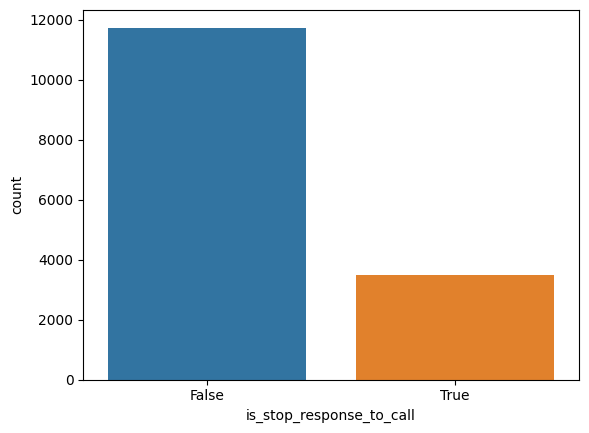

In [ ]:
sns.countplot(data = df, x = 'is_stop_response_to_call')

SAN FRANCISCO                               14185
UNINCORPORATED AREA-SAN MATEO COUNTY          602
UNINCORPORATED AREA-SAN FRANCISCO COUNTY      338
SOUTH SAN FRANCISCO                            48
SAN MATEO                                      26
SAN BRUNO                                      15
MILLBRAE                                        7
BURLINGAME                                      4
OAKLAND                                         2
SAN FERNANDO                                    2
VALLEJO                                         1
HAYWARD                                         1
Name: city, dtype: int64


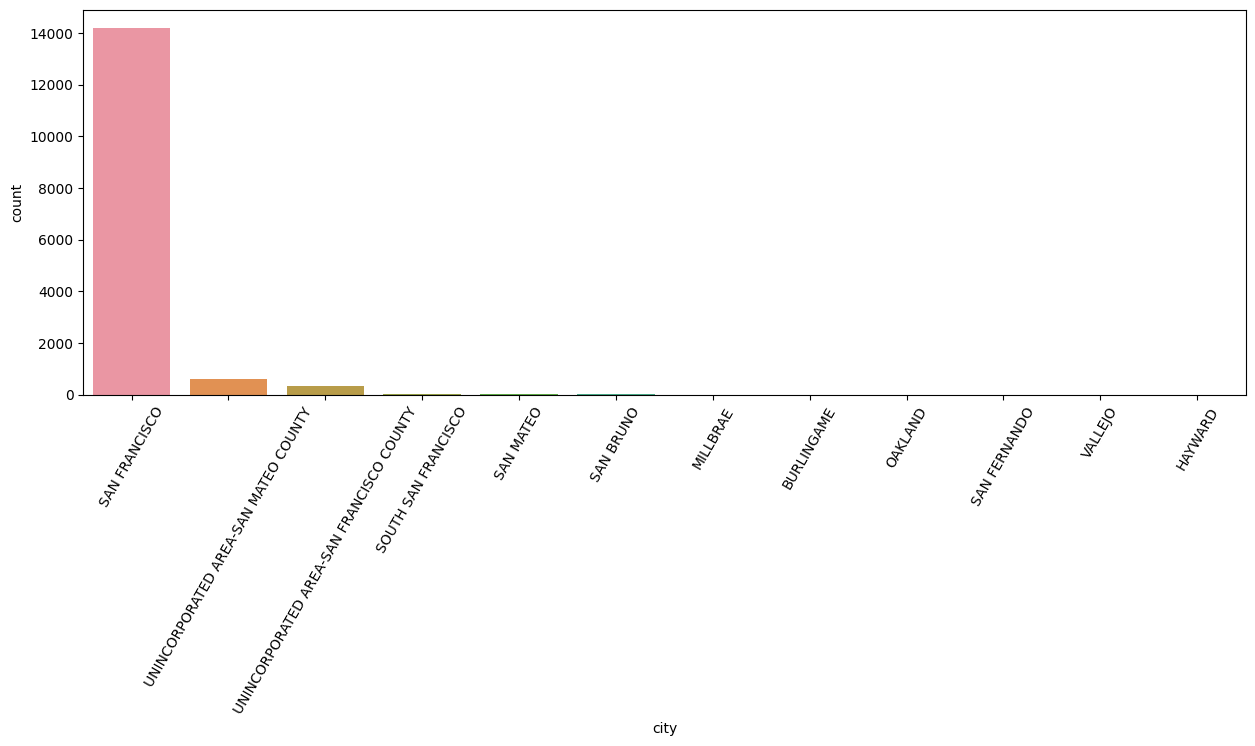

In [ ]:
print(df['city'].value_counts())
plt.figure(figsize = (15,5))
sns.countplot(data = df, order = df.city.value_counts().index,
              x = 'city')
plt.xticks(rotation = 60)
plt.show()

White                            5152
Black/African American           3626
Hispanic/Latino(a)               3065
Asian                            1725
Middle Eastern or South Asian    1083
Multi-racial                      371
Pacific Islander                  183
Native American                    26
Name: perceived_race_ethnicity, dtype: int64


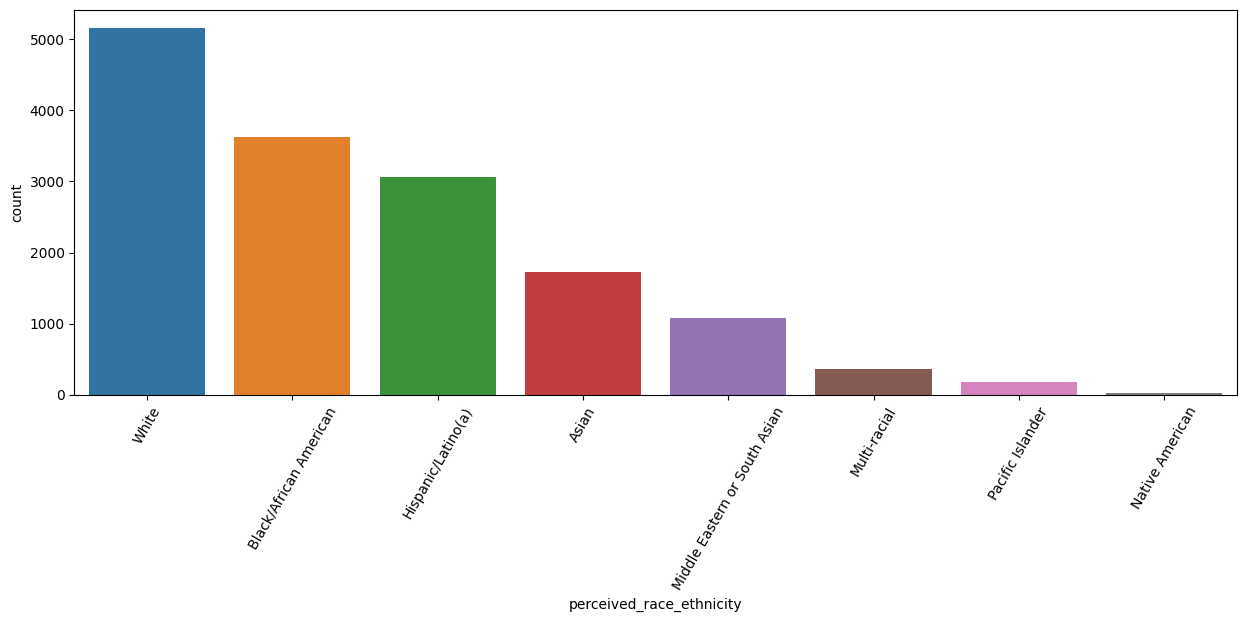

In [ ]:
print(df['perceived_race_ethnicity'].value_counts())
plt.figure(figsize = (15,5))
sns.countplot(data = df, order = df.perceived_race_ethnicity.value_counts().index,
              x = 'perceived_race_ethnicity')
plt.xticks(rotation = 60)
plt.show()

Male                      11765
Female                     3379
Gender Nonconforming         40
Transgender woman/girl       37
Transgender man/boy          10
Name: perceived_gender, dtype: int64


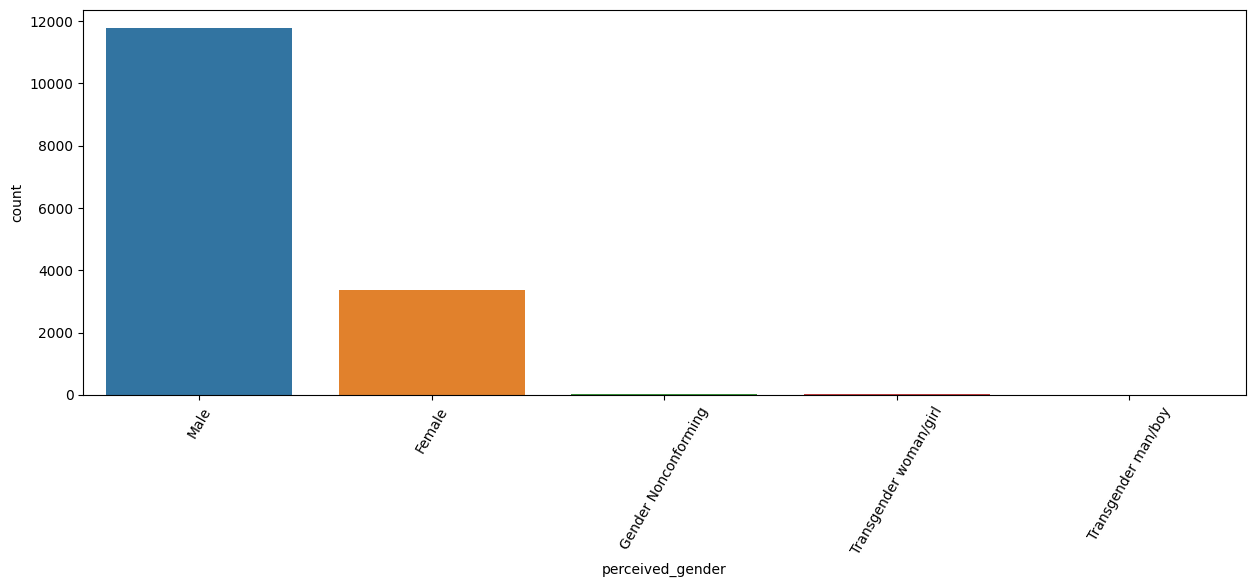

In [ ]:
print(df['perceived_gender'].value_counts())
plt.figure(figsize = (15,5))
sns.countplot(data = df, order = df.perceived_gender.value_counts().index,
              x = 'perceived_gender')
plt.xticks(rotation = 60)
plt.show()

In [ ]:
#sns.lineplot(data = df, x = 'longitude', y = 'latitude')
#plt.show()

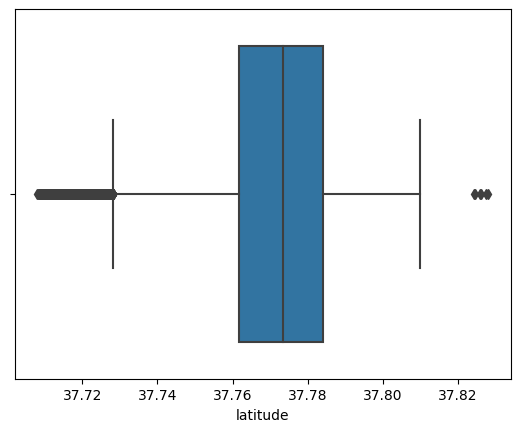

In [ ]:
sns.boxplot(data = df, x = 'latitude')
plt.show()

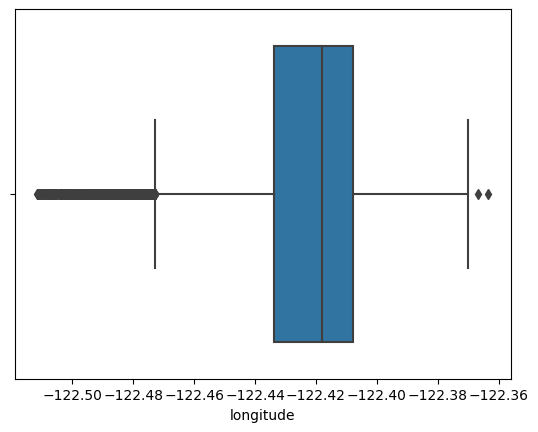

In [ ]:
sns.boxplot(data = df, x = 'longitude')
plt.show()

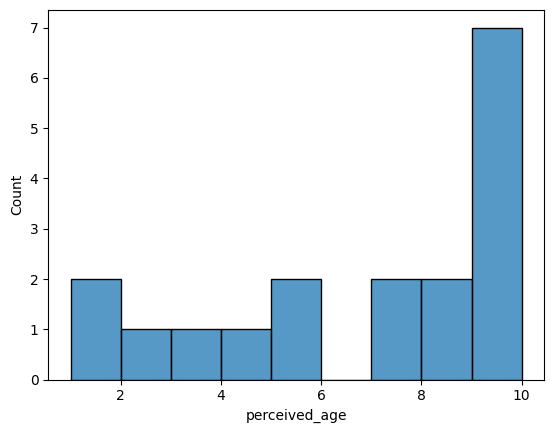

In [ ]:
sns.histplot(data = df[df['perceived_age'] < 11], x = 'perceived_age', binwidth = 1)
plt.show()

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_number,15231.0,1.095529e+00,0.686422,1.000000,1.000000,1.000000,1.000000,37.000000
duration_of_stop,15231.0,2.021226e+01,47.438988,1.000000,6.000000,10.000000,20.000000,1440.000000
perceived_age,15231.0,3.710124e+01,12.503530,1.000000,28.000000,35.000000,45.000000,100.000000
longitude,15231.0,-1.224241e+02,0.025431,-122.511425,-122.433820,-122.417961,-122.407802,-122.363425
latitude,15231.0,3.777003e+01,0.021108,37.708086,37.761817,37.773285,37.784152,37.828019
stop_year,15231.0,2.022490e+03,0.499920,2022.000000,2022.000000,2022.000000,2023.000000,2023.000000
stop_month,15231.0,6.432473e+00,3.313379,1.000000,4.000000,6.000000,9.000000,12.000000
stop_day,15231.0,1.564710e+01,8.796735,1.000000,8.000000,16.000000,23.000000,31.000000
stop_hour,15231.0,1.415882e+01,6.148677,0.000000,10.000000,15.000000,19.000000,23.000000
stop_minute,15231.0,2.807012e+01,17.478934,0.000000,14.000000,29.000000,43.000000,59.000000


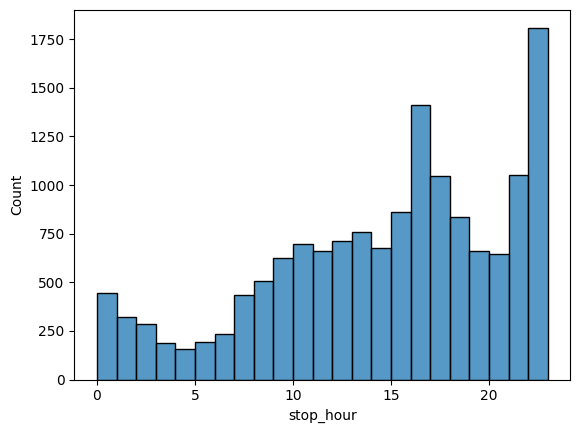

In [ ]:
sns.histplot(data = df, x = 'stop_hour', binwidth = 1)
plt.show()

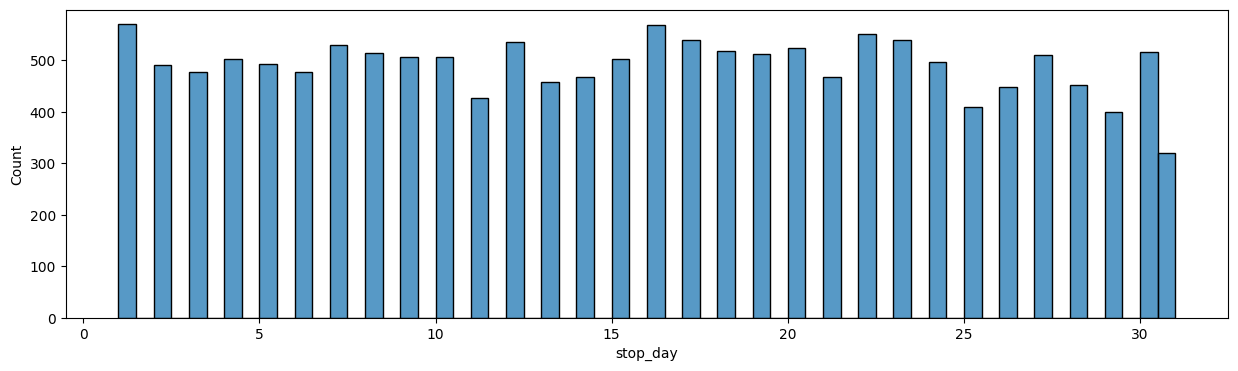

In [ ]:
plt.figure(figsize = (15, 4))
sns.histplot(data = df, x = 'stop_day', binwidth = 0.5, binrange=(1,31))
plt.show()

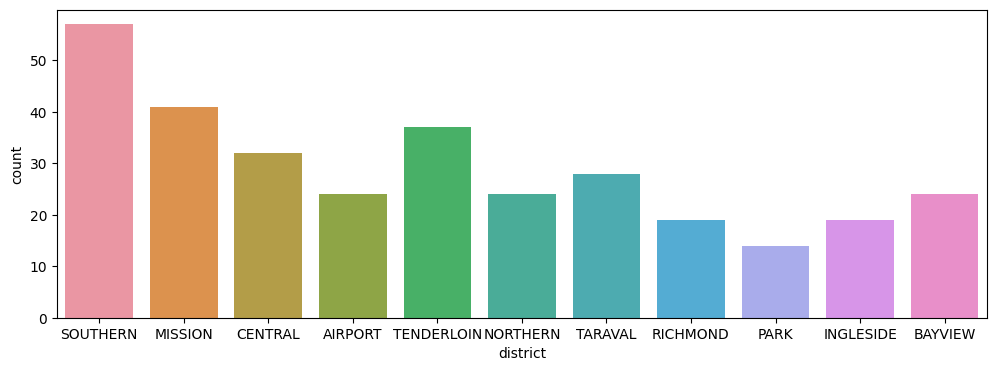

In [ ]:
plt.figure(figsize = (12,4))
sns.countplot(data = df[df['stop_day'] == 31], x = 'district',
              order = df['district'].value_counts().index)
plt.show()


15-17    3319
21-23    2858
12-14    2150
18-20    2141
09-11    1985
06-08    1181
00-02    1057
03-05     540
Name: 3_hour_window, dtype: int64


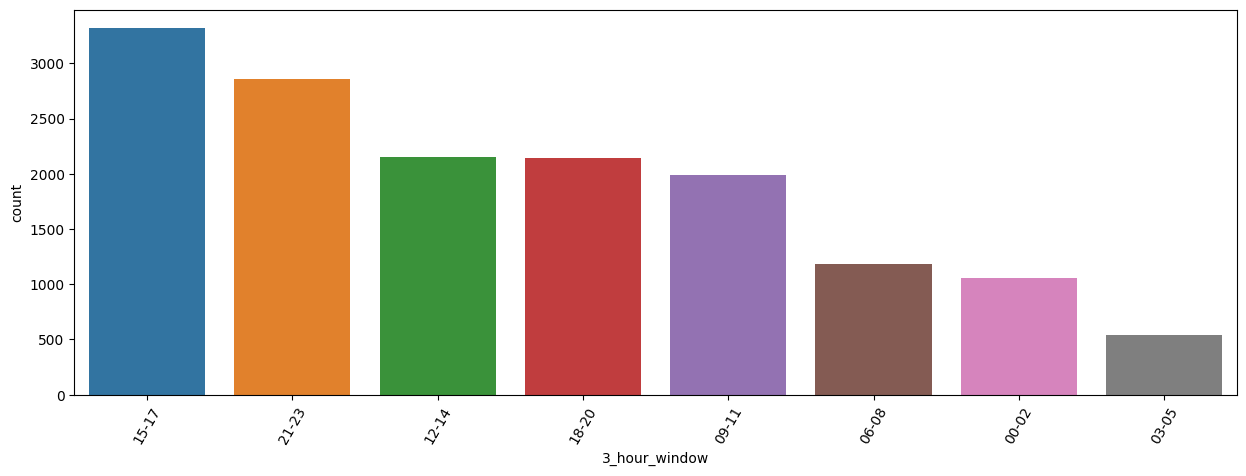

In [ ]:
print(df['3_hour_window'].value_counts())
plt.figure(figsize = (15,5))
sns.countplot(data = df, order = df['3_hour_window'].value_counts().index,
              x = '3_hour_window')
plt.xticks(rotation = 60)
plt.show()

In the above countplot of 3-hour windows, we have 15.00-17:59 hours have the most number of incidents which is during the evening peak hour traffic when the schools and work hours are over. The next slot is late in the evening from 21:00 to 23:59 hours - probably the party hours.

So, it would be good to re-do this countplot based on weekend or weekday and based on district and location.

## Multivariate analysis

This is to capture analysis of multiple variables. This is called multivariate analysis.

15-17    3319
21-23    2858
12-14    2150
18-20    2141
09-11    1985
06-08    1181
00-02    1057
03-05     540
Name: 3_hour_window, dtype: int64


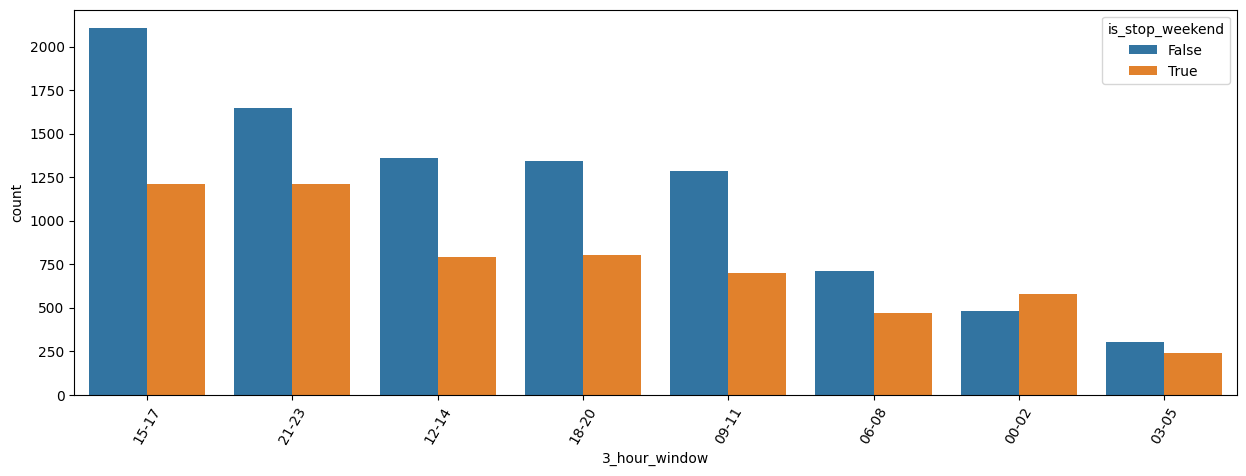

In [ ]:
print(df['3_hour_window'].value_counts())
plt.figure(figsize = (15,5))
sns.countplot(data = df, order = df['3_hour_window'].value_counts().index,
              x = '3_hour_window', hue = 'is_stop_weekend')
plt.xticks(rotation = 60)
plt.show()

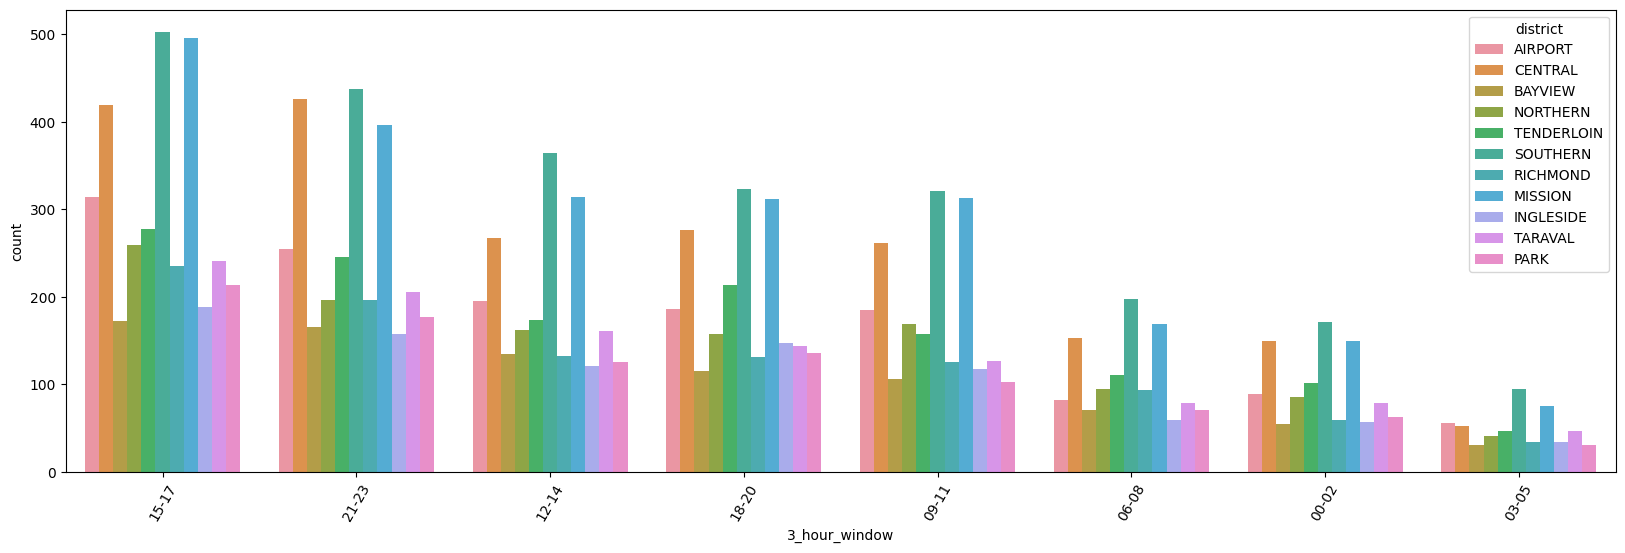

In [ ]:
plt.figure(figsize = (20,6))
sns.countplot(data = df, order = df['3_hour_window'].value_counts().index,
              x = '3_hour_window', hue = 'district')
plt.xticks(rotation = 60)
plt.show()

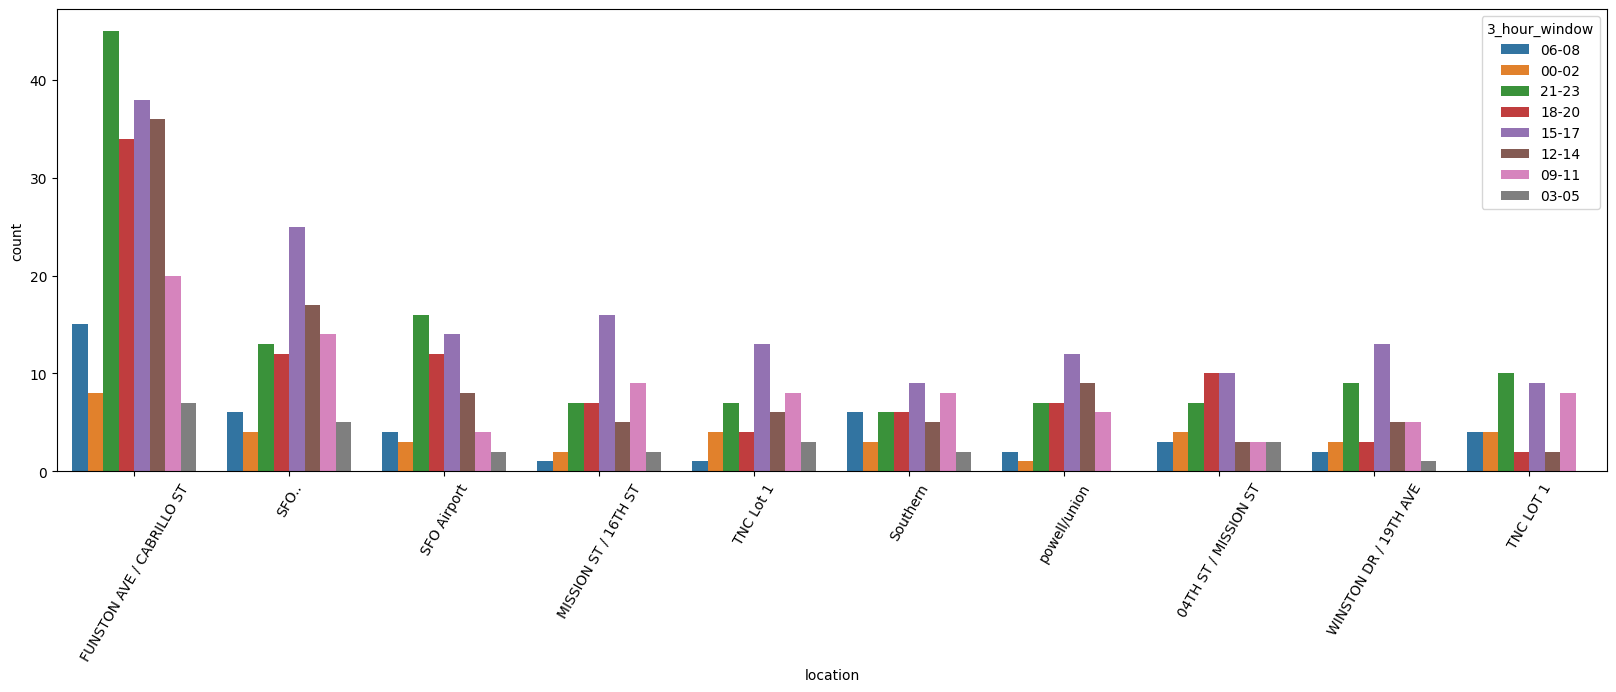

In [ ]:
order = df.location.value_counts().iloc[:10].index
plt.figure(figsize = (20,6))
sns.countplot(data = df, order = df.location.value_counts().iloc[:10].index,
              x = 'location', hue = '3_hour_window')
plt.xticks(rotation = 60)
plt.show()

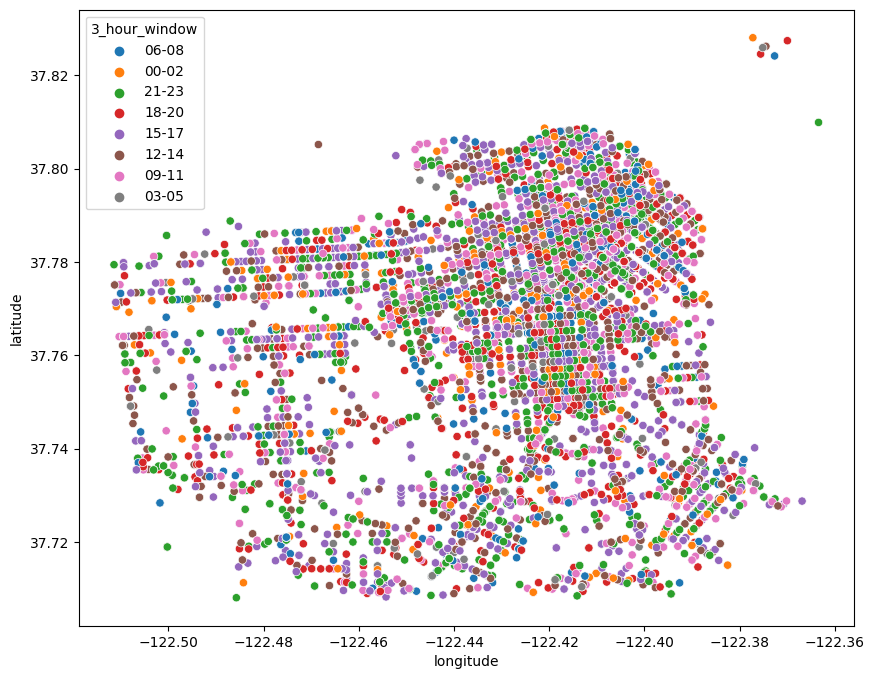

In [ ]:
plt.figure(figsize = (10,8))
sns.scatterplot(data = df, x = 'longitude', y = 'latitude', hue = '3_hour_window')
plt.show()

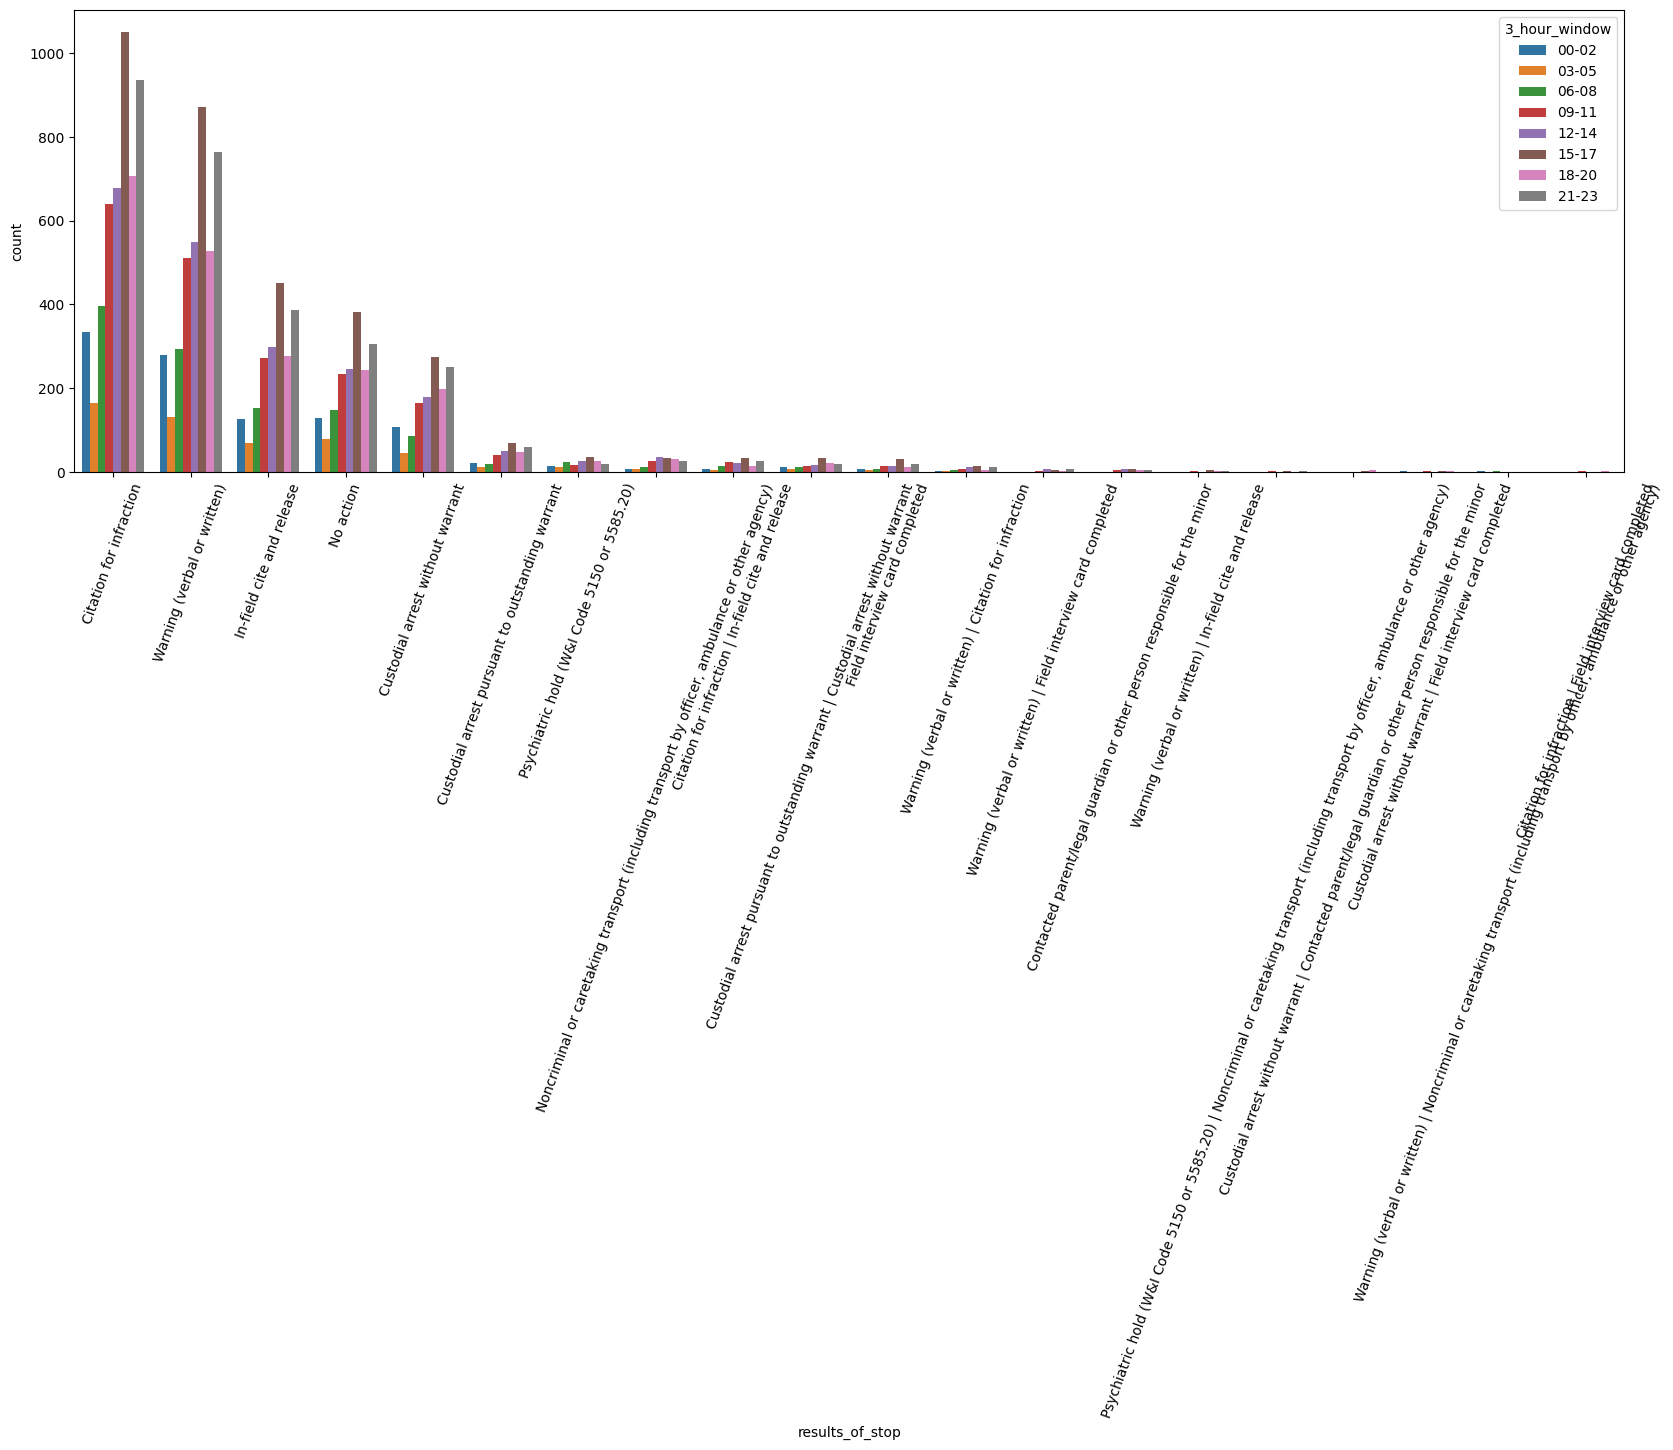

In [ ]:
plt.figure(figsize = (20,6))
sns.countplot(data = df, order = df['results_of_stop'].value_counts().iloc[:20].index,
              x = 'results_of_stop',
              hue = '3_hour_window', hue_order = sorted(df['3_hour_window'].unique()))
plt.xticks(rotation = 70)
plt.show()

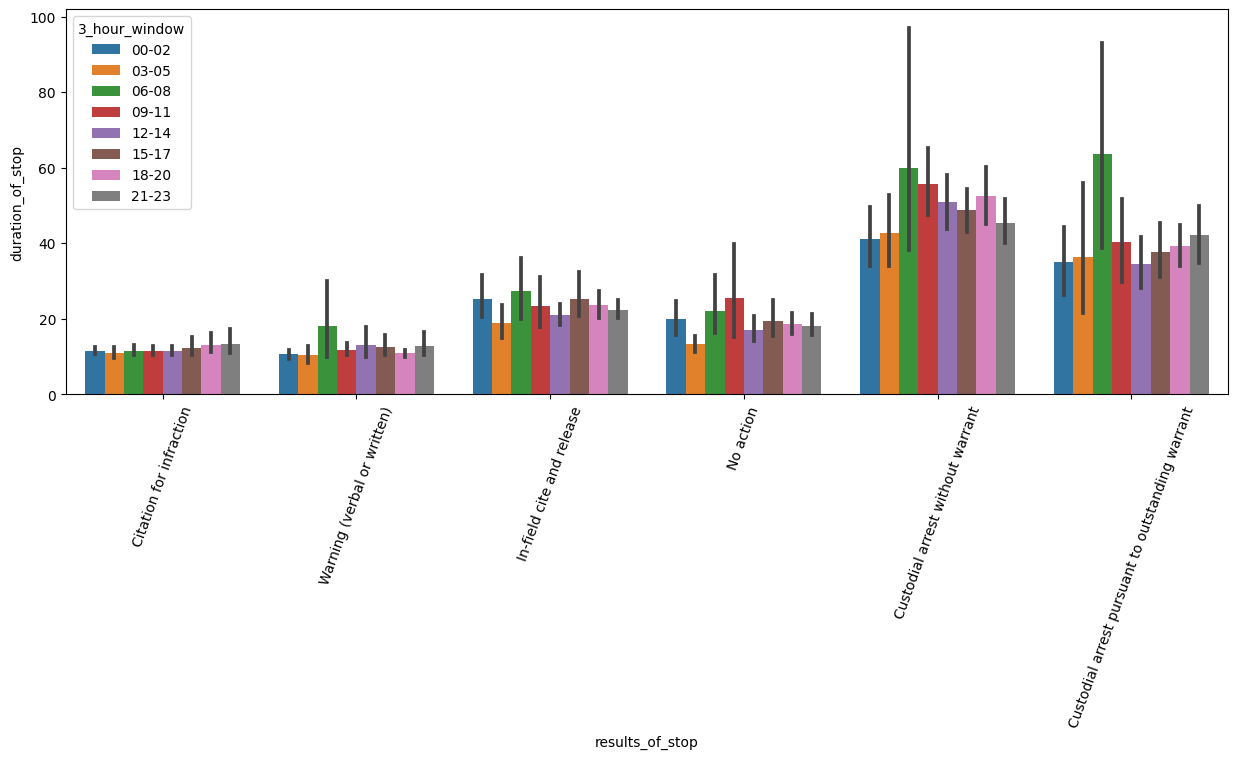

In [ ]:
plt.figure(figsize = (15,5))
sns.barplot(data = df, order = df['results_of_stop'].value_counts().iloc[:6].index,
            x = 'results_of_stop', y = 'duration_of_stop',
            hue = '3_hour_window', hue_order = sorted(df['3_hour_window'].unique()))
plt.xticks(rotation = 70)
plt.show()

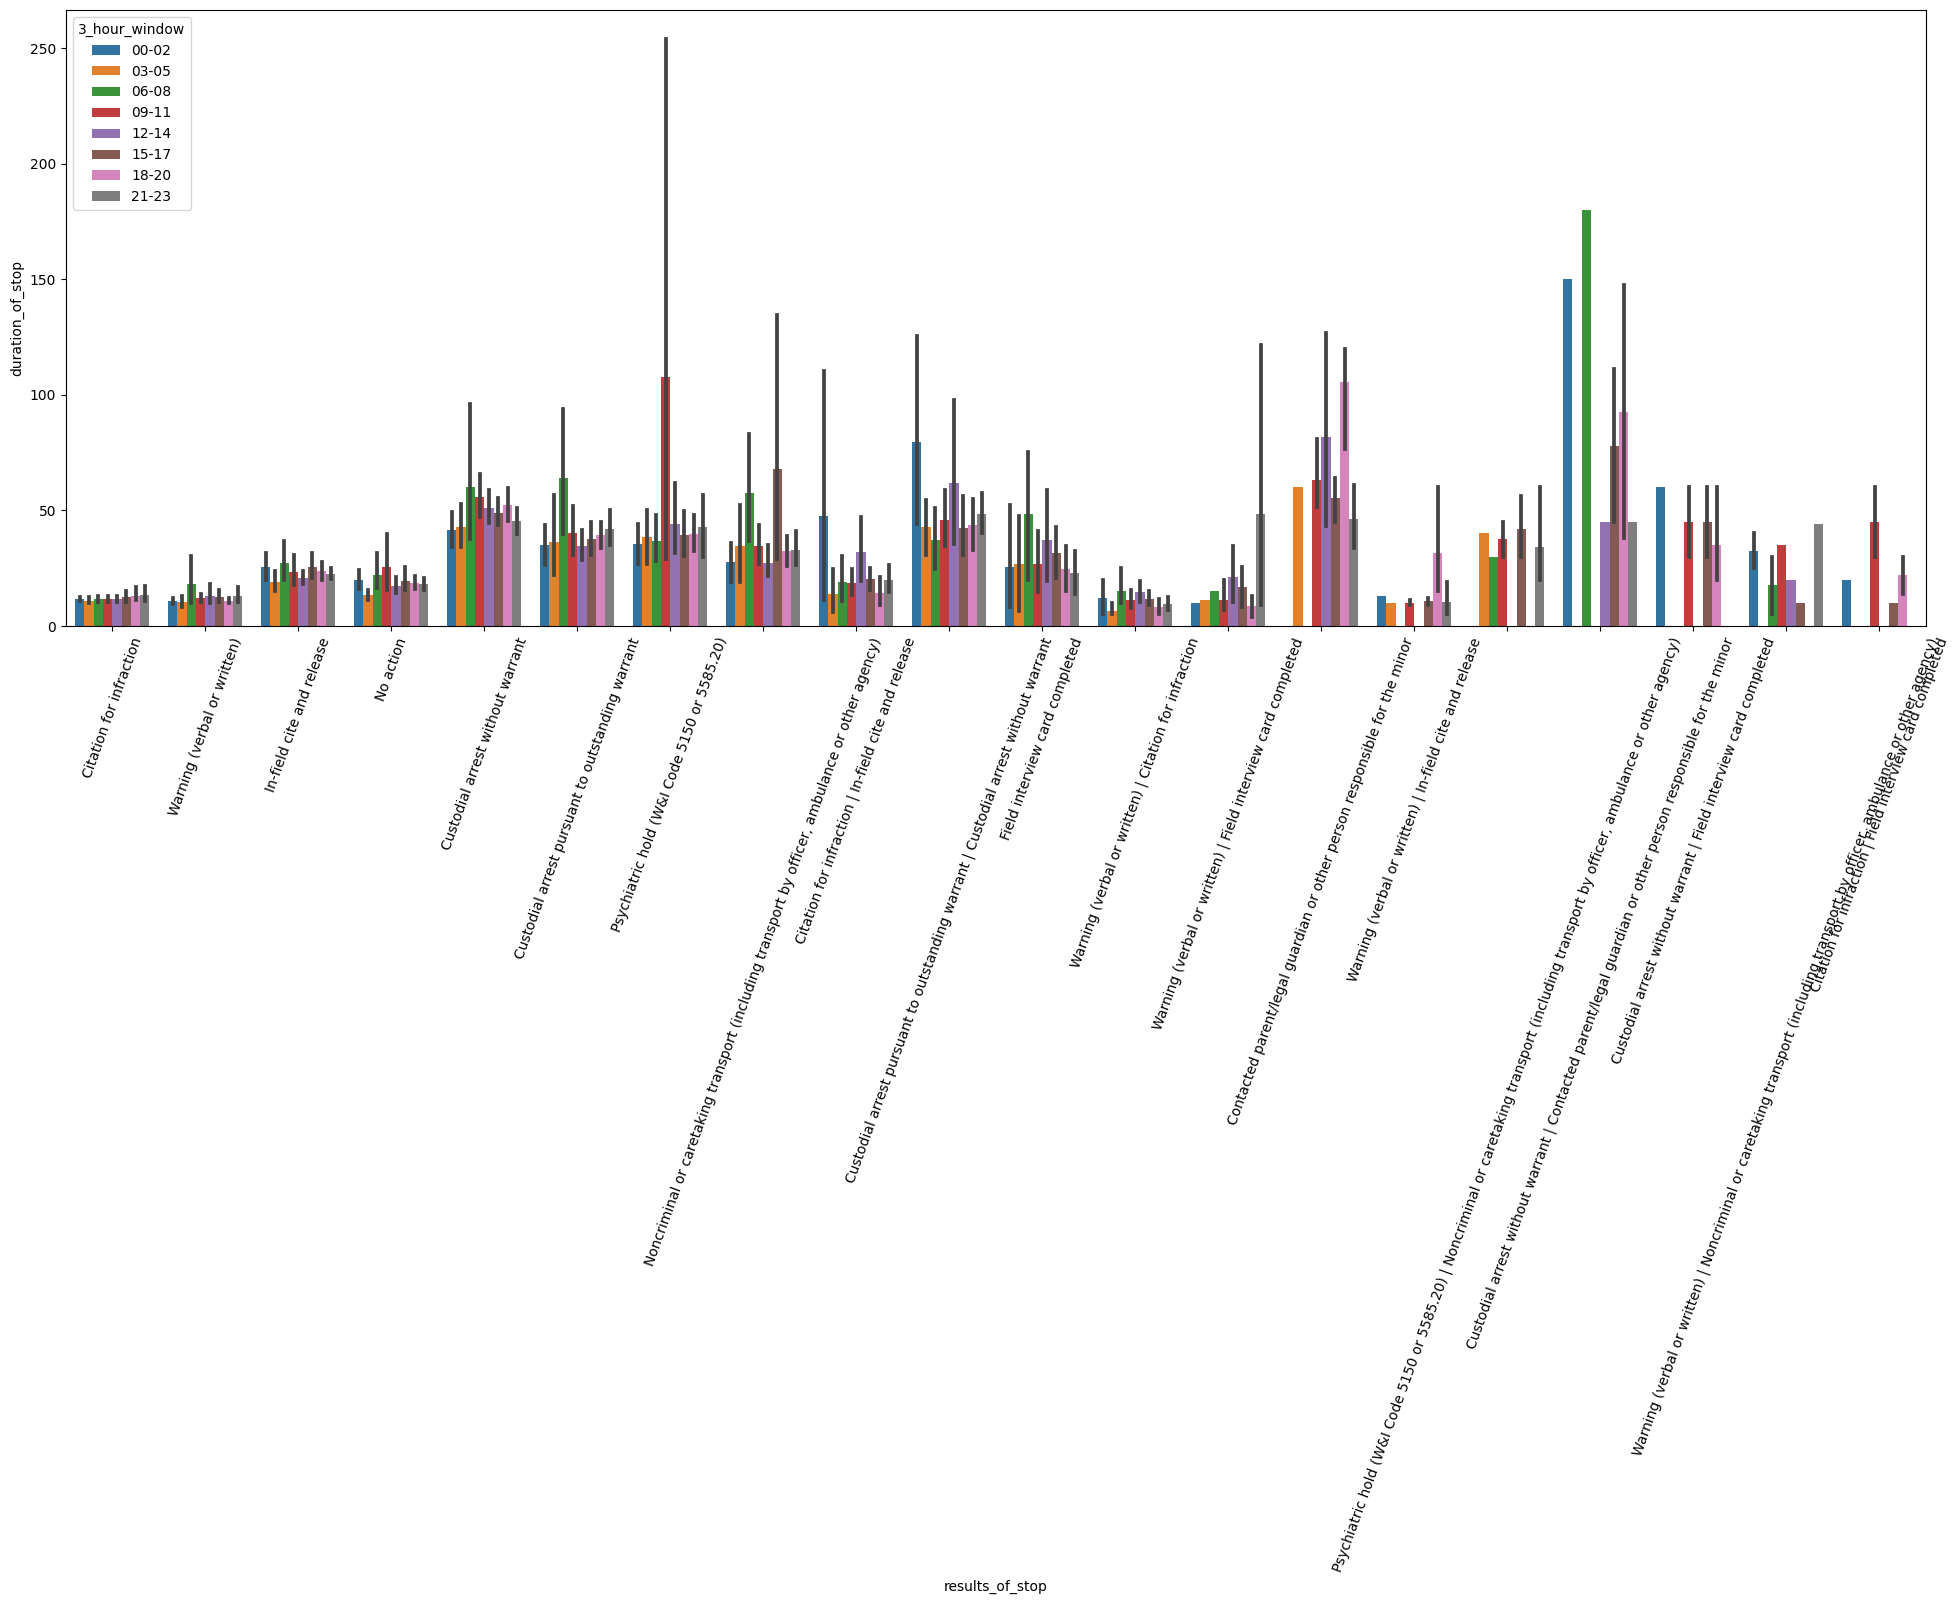

In [ ]:
plt.figure(figsize = (24,8))
sns.barplot(data = df, order = df['results_of_stop'].value_counts().iloc[:20].index,
            x = 'results_of_stop', y = 'duration_of_stop',
            hue = '3_hour_window', hue_order = sorted(df['3_hour_window'].unique()))
plt.xticks(rotation = 70)
plt.show()

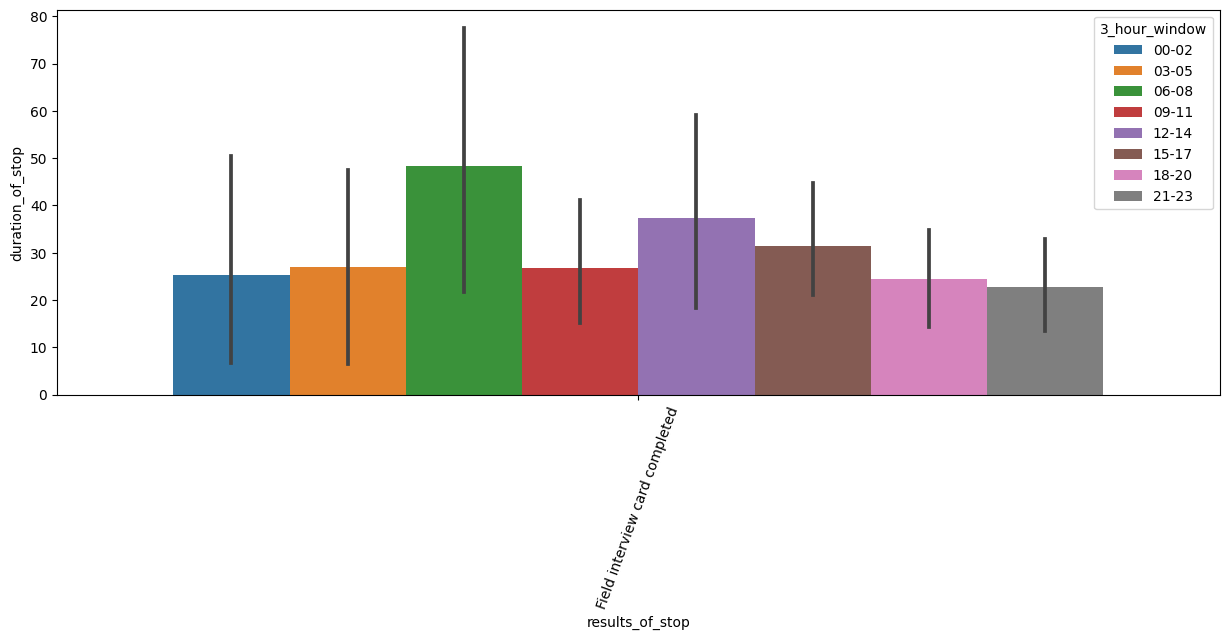

In [ ]:
plt.figure(figsize = (15,5))
sns.barplot(data = df[df['results_of_stop'] == 'Field interview card completed'],
            x = 'results_of_stop', y = 'duration_of_stop',
            hue = '3_hour_window', hue_order = sorted(df['3_hour_window'].unique()))
plt.xticks(rotation = 70)
plt.show()

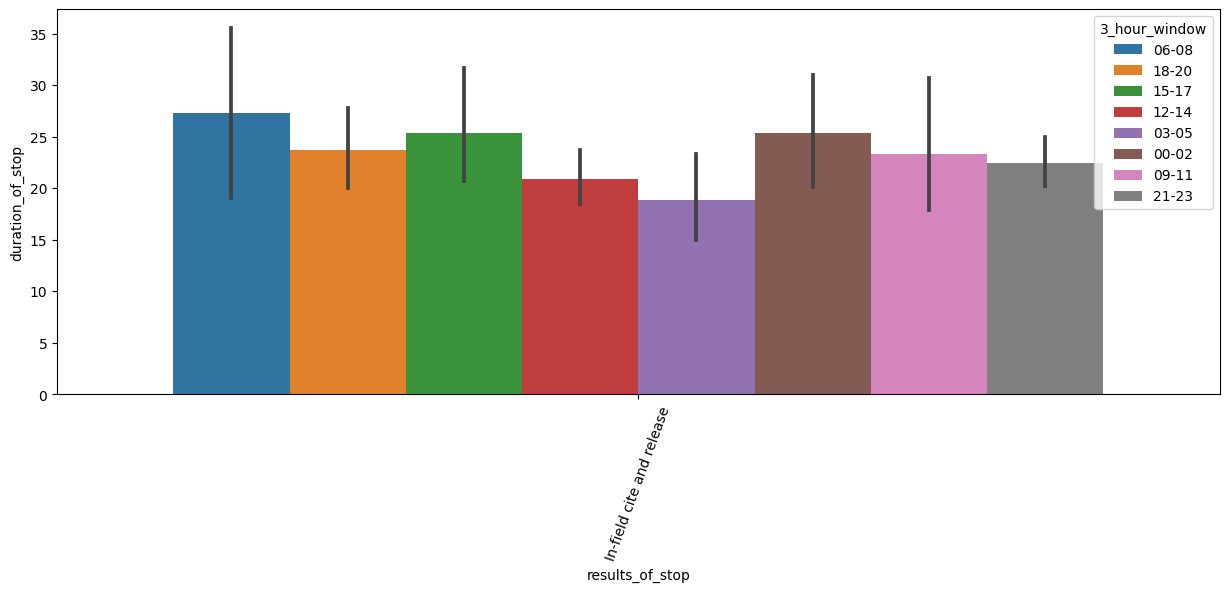

In [ ]:
plt.figure(figsize = (15,5))
sns.barplot(data = df[df['results_of_stop'] == 'In-field cite and release'],
              x = 'results_of_stop', y = 'duration_of_stop', hue = '3_hour_window')
plt.xticks(rotation = 70)
plt.show()

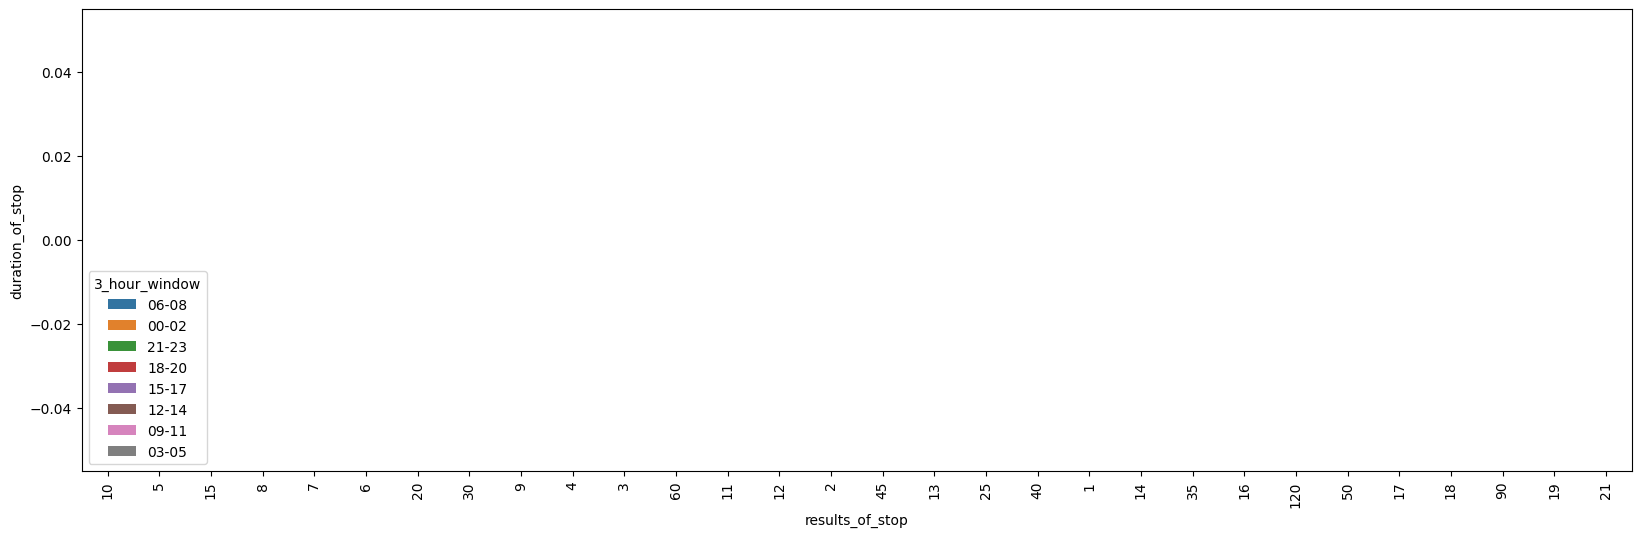

In [ ]:
 plt.figure(figsize = (20,6))
sns.barplot(data = df, order = df['duration_of_stop'].value_counts().iloc[:30].index,
              x = 'results_of_stop', y = 'duration_of_stop', hue = '3_hour_window')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# Data Transformation:
def compute_stop_intensity(result):
  if 'Psychiatric hold' in result or 'Contacted parent' in result or 'Noncriminal transport' in result:
    return 'red'
  elif 'arrest' in result:
    return 'amber'
  elif 'Field interview card' in result or 'In-field cite' in result or 'No action' in result:
    return 'yellow'
  else:
    return 'green'

# Apply the function to create a new column 'stop_intensity'
df['stop_intensity'] = df['results_of_stop'].apply(compute_stop_intensity)


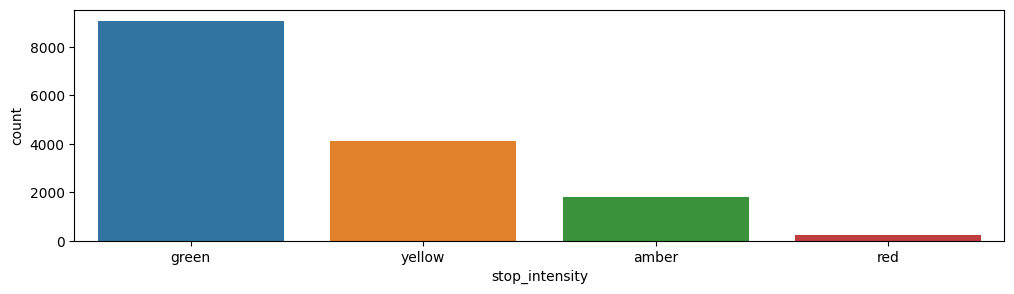

In [ ]:
plt.figure(figsize = (12,3))
sns.countplot(data = df,
              x = 'stop_intensity', order = df['stop_intensity'].value_counts().index)
plt.show()

<Figure size 2400x800 with 0 Axes>

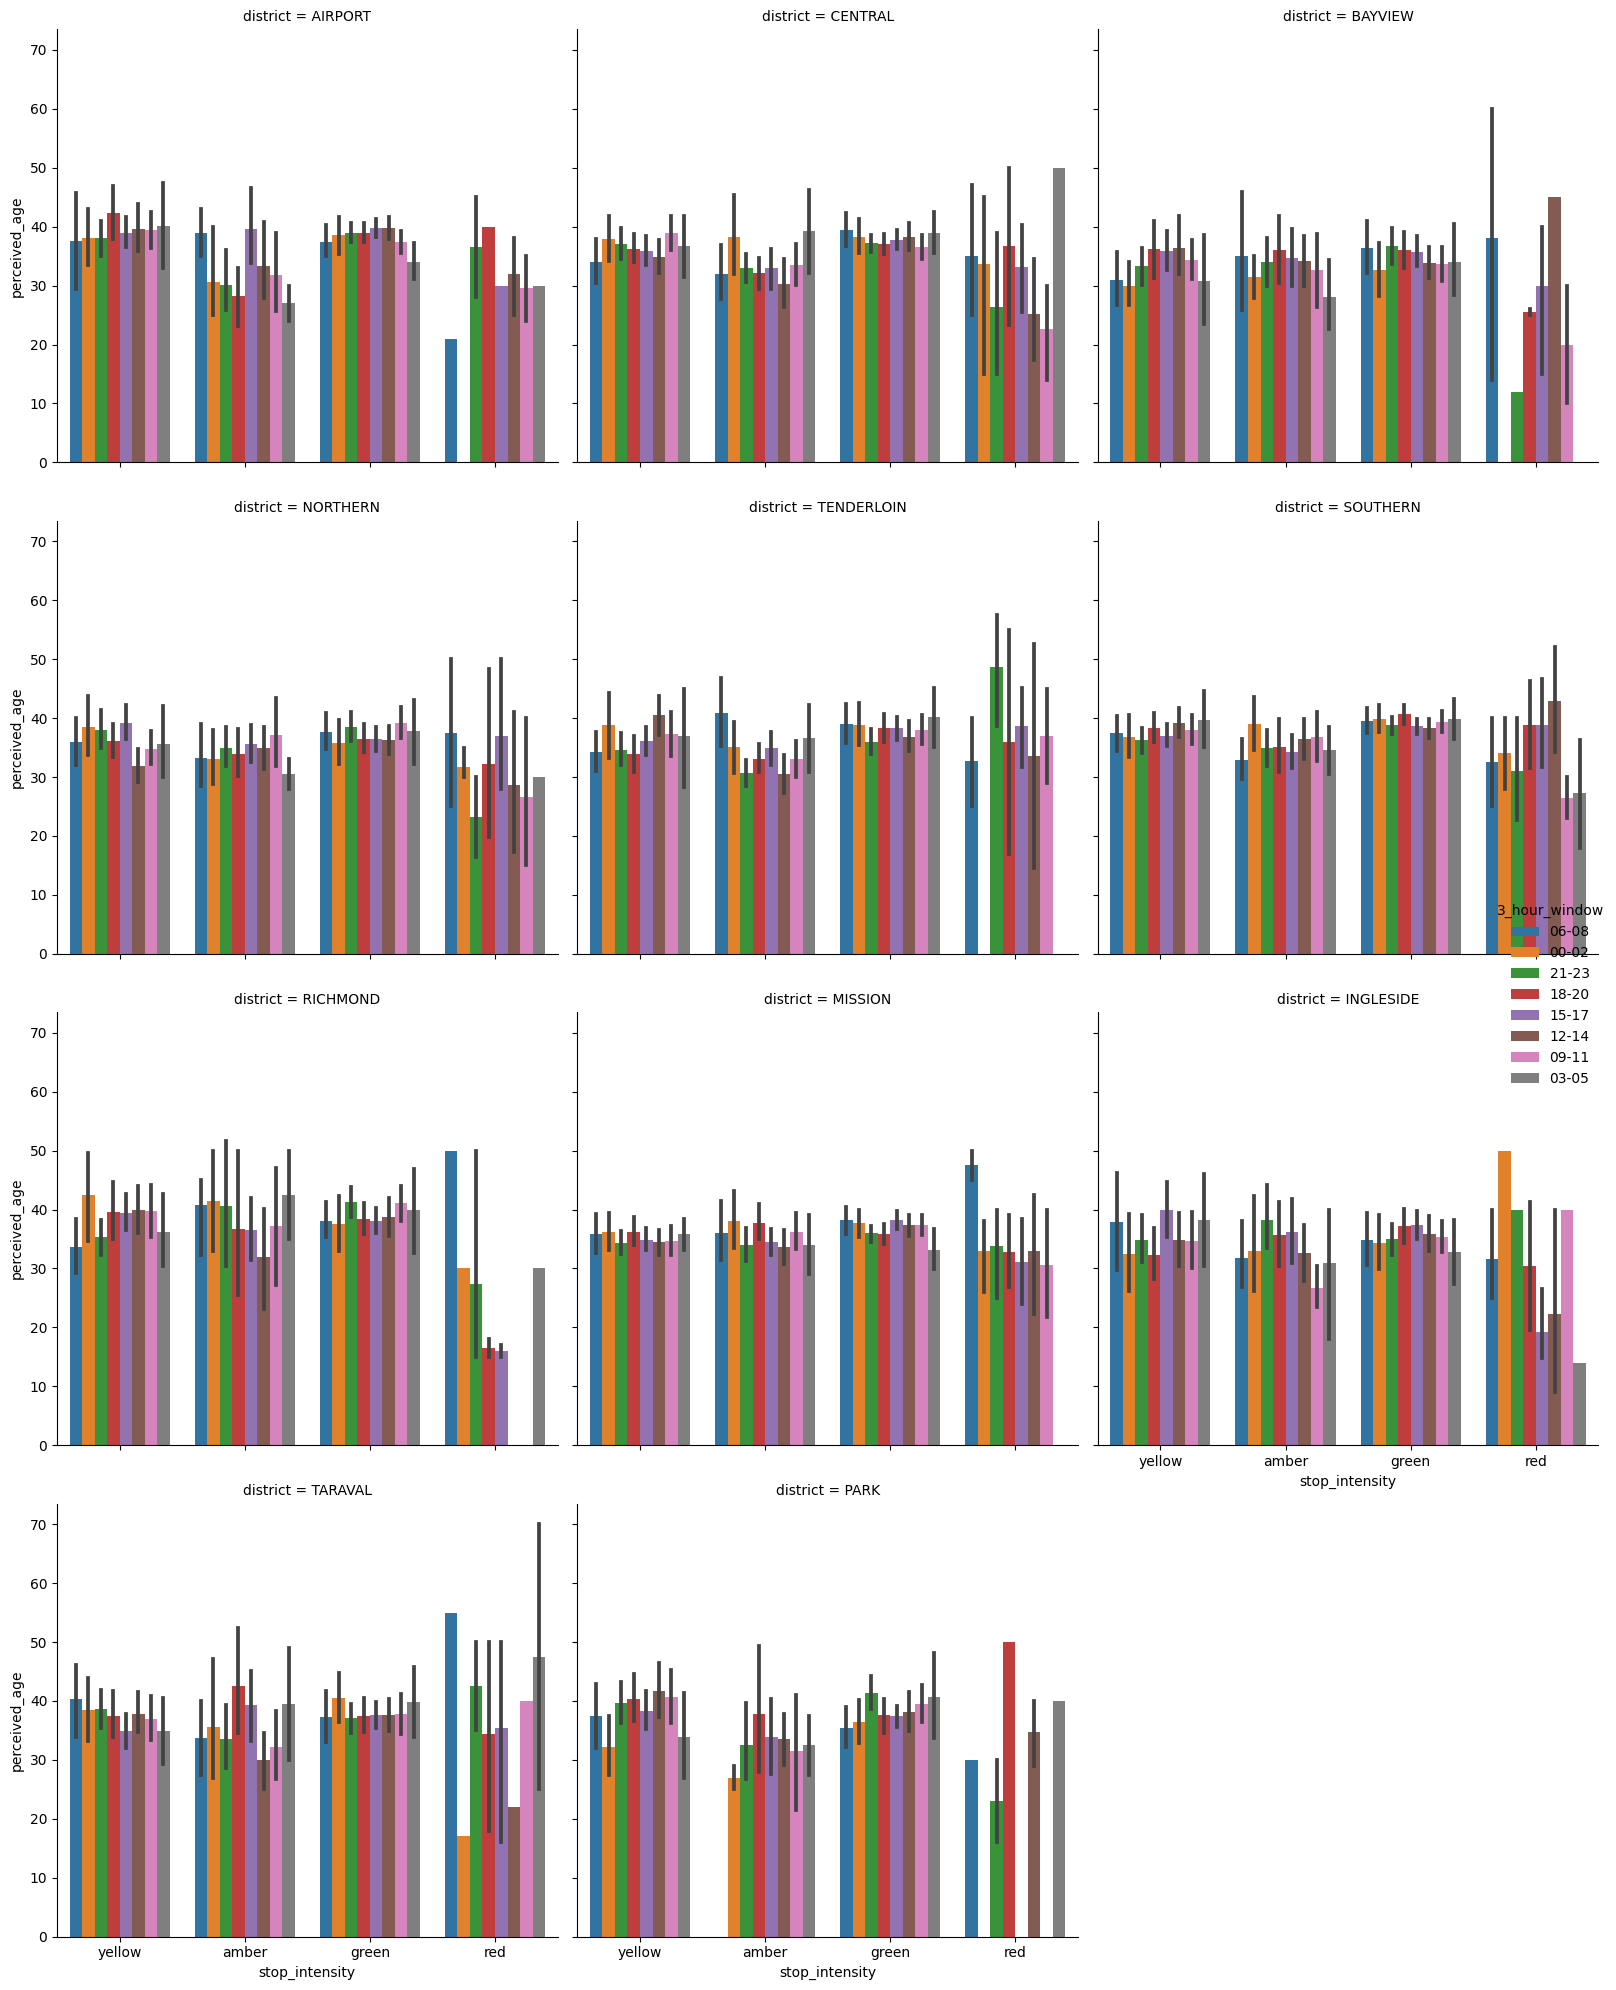

In [ ]:
plt.figure(figsize = (24,8))
#sns.barplot(data = df, order = df['district'].value_counts().iloc[:20].index,
#              x = 'district', y = '3_hour_window', hue = 'stop_intensity')
sns.catplot(data = df, x = 'stop_intensity', y = 'perceived_age',
            col = 'district', hue = '3_hour_window', kind = 'bar', col_wrap = 3)
#plt.xticks(rotation = 70)
plt.tight_layout()
plt.show()

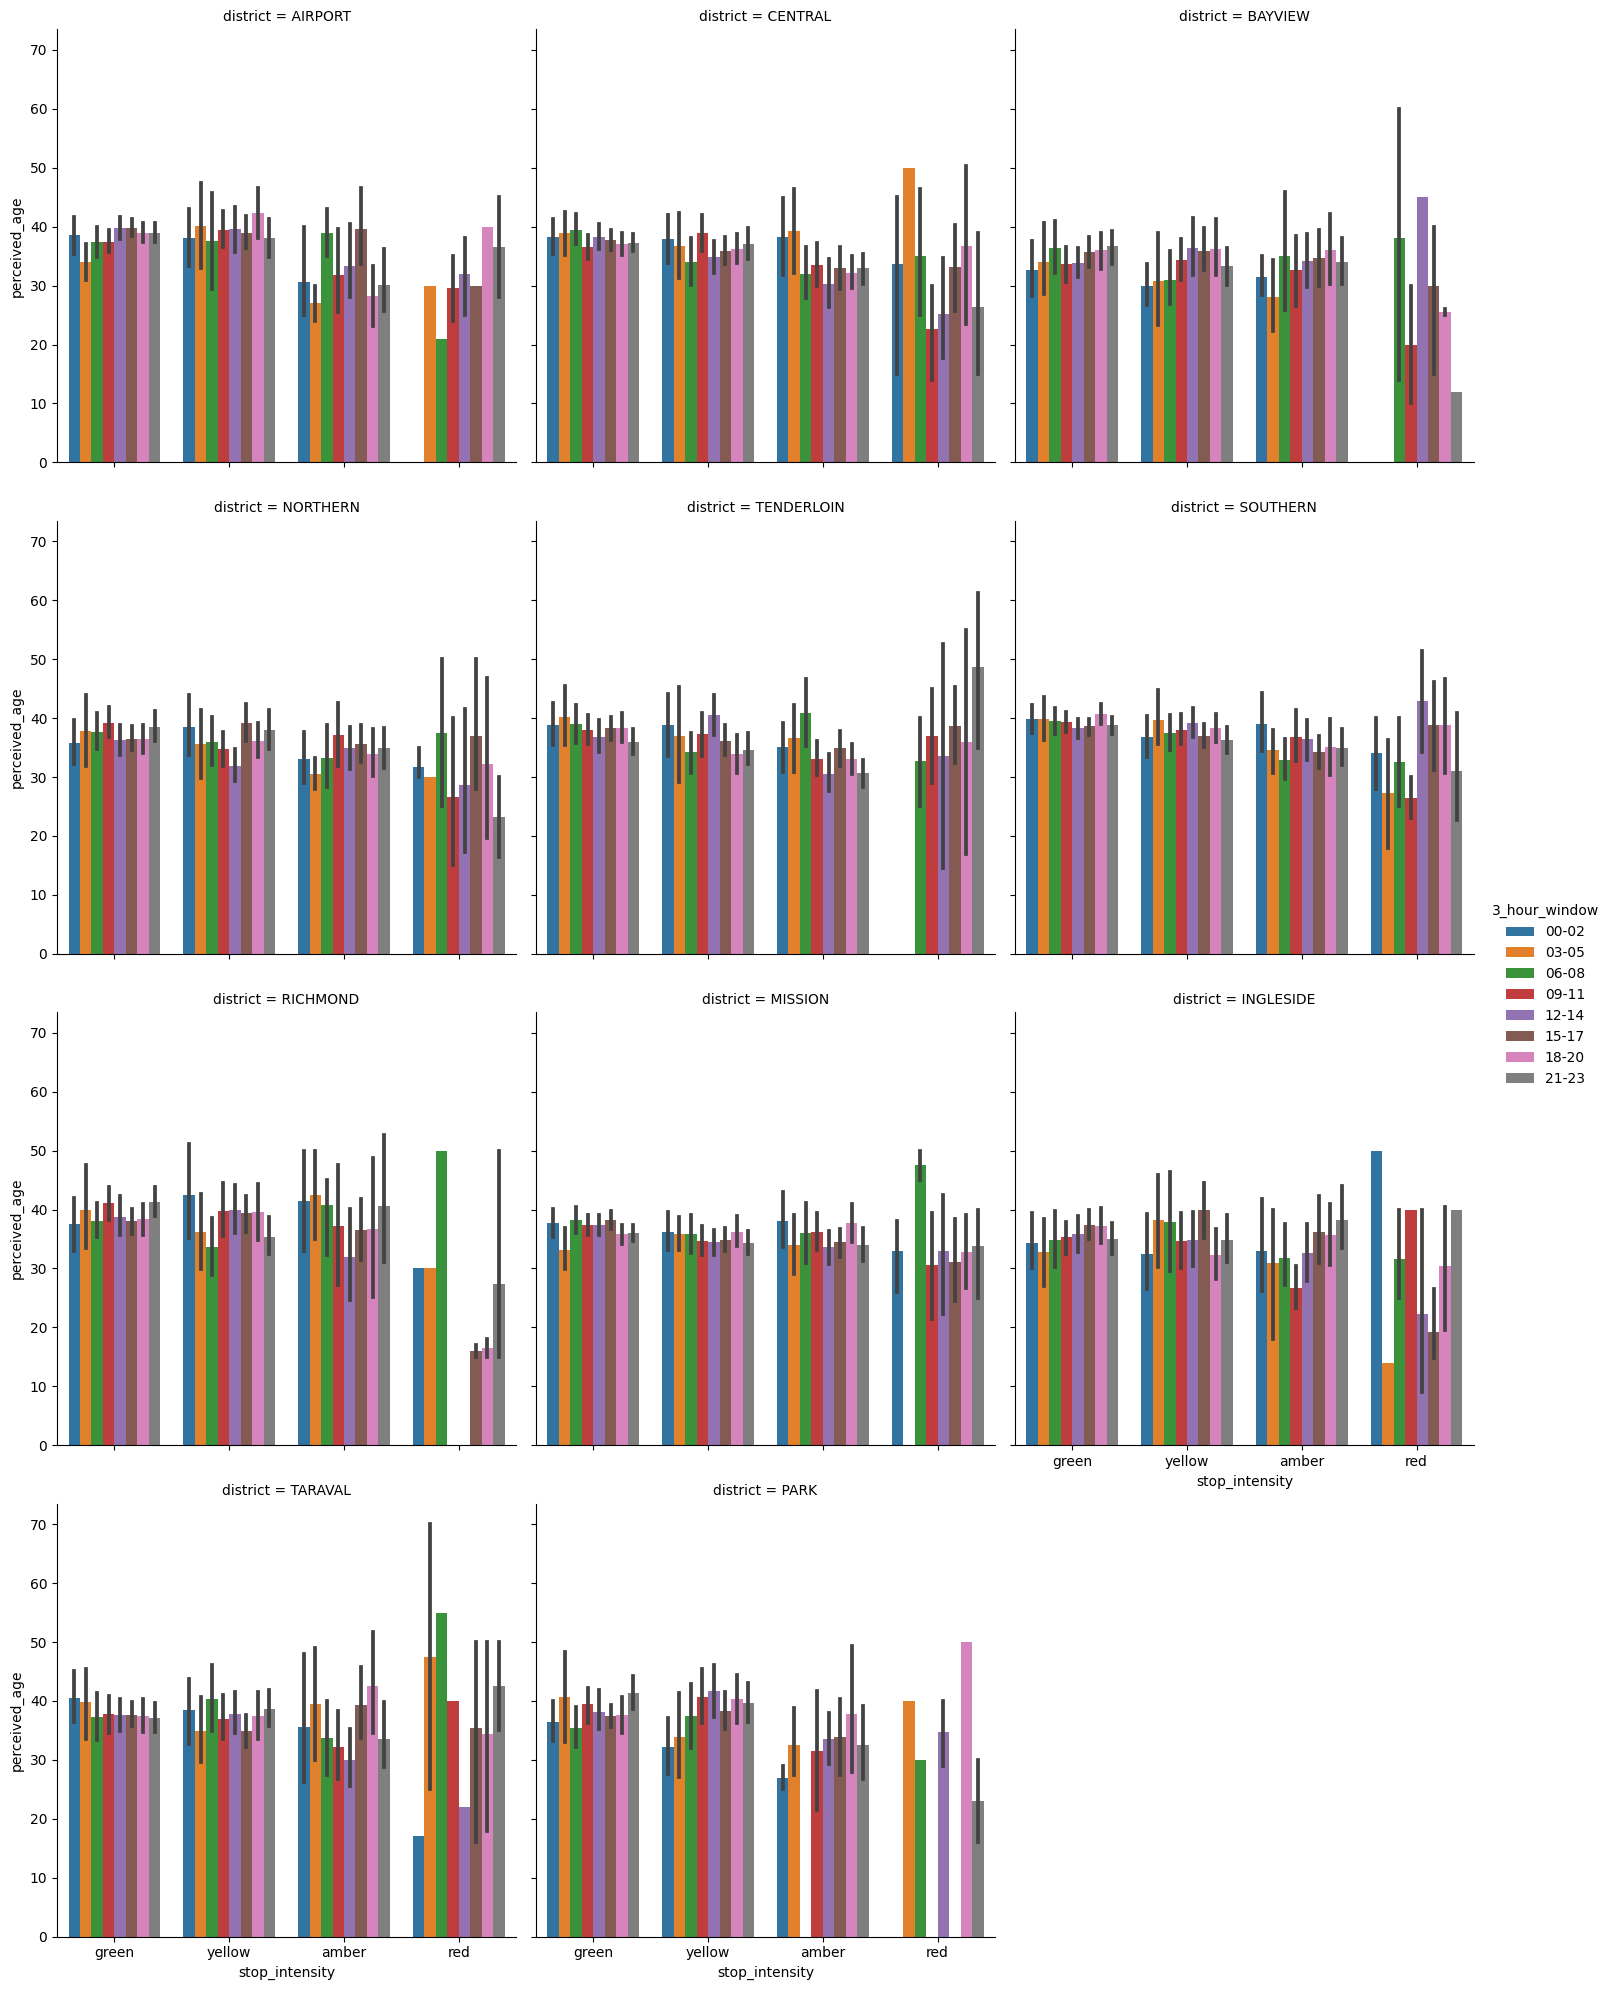

In [ ]:
sorted_3_hour_window = sorted(df['3_hour_window'].unique())
sns.catplot(data = df, x = 'stop_intensity', y = 'perceived_age', order = df['stop_intensity'].value_counts().index,
            col = 'district', hue = '3_hour_window', hue_order = sorted_3_hour_window,
            kind = 'bar', col_wrap = 3)
plt.show()

In [ ]:
df.drop(['doj_record_id', 'stop_datetime', 'results_of_stop'], axis = 1, inplace = True)
df.reset_index()

,index,person_number,duration_of_stop,is_stop_response_to_call,location,district,city,perceived_race_ethnicity,perceived_gender,is_lgbt,...,stop_year,stop_month,stop_day,stop_hour,stop_minute,is_stop_weekend,3_hour_window,scaled_longitude,scaled_latitude,stop_intensity
0,0,1,90,True,Terminal 2 departure level,AIRPORT,UNINCORPORATED AREA-SAN MATEO COUNTY,White,Male,False,...,2023,6,28,8,6,False,06-08,0.240779,0.132735,yellow
1,1,2,70,False,100 Block of Post St,CENTRAL,SAN FRANCISCO,White,Male,False,...,2023,6,28,2,55,False,00-02,0.803070,0.893647,amber
2,2,1,60,False,WISCONSIN ST / CORAL RD,BAYVIEW,SAN FRANCISCO,Black/African American,Male,False,...,2023,6,28,2,54,False,00-02,1.001852,-0.767937,yellow
3,3,1,1,False,GOLDEN GATE AVE / VAN NESS AVE,NORTHERN,SAN FRANCISCO,Black/African American,Male,False,...,2023,6,27,23,30,False,21-23,0.143256,0.521126,amber
4,4,1,120,True,O''Farrell Street and Grant Street,TENDERLOIN,SAN FRANCISCO,Black/African American,Female,False,...,2023,6,27,22,43,False,21-23,0.766814,0.791172,amber
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15226,17973,1,7,False,mission st / 5th st,SOUTHERN,SAN FRANCISCO,Middle Eastern or South Asian,Male,False,...,2022,6,1,9,0,False,09-11,0.692256,0.601714,yellow
15227,17975,1,15,False,TARAVAL ST / 22ND AVE,TARAVAL,SAN FRANCISCO,Black/African American,Male,False,...,2022,6,1,8,30,False,06-08,-2.155813,-1.284955,yellow
15228,17976,1,10,False,Polk and Geary,NORTHERN,SAN FRANCISCO,Asian,Male,False,...,2022,6,1,8,3,False,06-08,0.170822,0.751470,green
15229,17977,1,7,False,MONTGOMERY ST / NEW MONTGOMERY ST,CENTRAL,SAN FRANCISCO,White,Male,False,...,2022,6,1,7,57,False,06-08,0.865792,0.885451,green


In [ ]:
df.info()
features = ['person_number','duration_of_stop','is_stop_response_to_call',
            'district','city','perceived_race_ethnicity','perceived_gender',
            'is_lgbt','perceived_age','had_limited_or_no_english',
            'perceived_or_known_disability','traffic_viol_off_code','latitude',
            'stop_month','stop_day','stop_hour','is_stop_weekend','3_hour_window']
target = ['stop_intensity']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15231 entries, 0 to 17978
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   person_number                  15231 non-null  int64  
 1   duration_of_stop               15231 non-null  int64  
 2   is_stop_response_to_call       15231 non-null  bool   
 3   location                       15231 non-null  object 
 4   district                       15231 non-null  object 
 5   city                           15231 non-null  object 
 6   perceived_race_ethnicity       15231 non-null  object 
 7   perceived_gender               15231 non-null  object 
 8   is_lgbt                        15231 non-null  bool   
 9   perceived_age                  15231 non-null  int64  
 10  perceived_age_group            15231 non-null  object 
 11  had_limited_or_no_english      15231 non-null  bool   
 12  perceived_or_known_disability  15231 non-null 

In [ ]:
ofpath = "/content/drive/MyDrive/Colab Notebooks/SFPD_Traffic_Violations/SFPD_Stop_Dataset_after_EDA.csv"
df.to_csv(ofpath)